# Visualising and analysing the users sentiments regarding renewable energy on Google and Python news APIs


## 1. Problem Definition

For this notebook, the problem we're trying to solve is,

> How well can we predict the sentiments of the german population in Hessen regarding renewable energy sources such as Wind and solar energy. 

    In this notebook, we have also explored the other aspects of natural language processing(NLP) such as parts of speech taging,chunking,chinking,named entity recognition. 
    
## 2. Data

> The data used is from Google and python news APIs.

**Features**
1. Title: the original news title
2. Media: the news source
3. Date: when was article published
4. Desc: description of the news article
5. Link: webpage url
6. Without stopwords: original title without any stopwords
7. polarity: Polarity is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment
8. subjectivity: Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective.
9. sentiment: the overall sentiment regarding the news
10. neg: negative sentiment
11. pos: positive sentiment
12. neu: neutral sentiment
13. compound: normalised sum of postive, negative and neutral sentiment within the range of -1(most extreme negative) and +1 (most extreme positive) 
14. tokenized: tokenized words from the cleaned title
15. lemmatized: synonyms of the cleaned title	

In [138]:
pip install GoogleNews 

Note: you may need to restart the kernel to use updated packages.


In [139]:
from GoogleNews import GoogleNews

In [140]:
# importing all necessary modules
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [141]:
googlenews = GoogleNews(lang='de', period='14d') 

In [142]:
search_terms = ['Windenergie', 'Windkraft', 'Windanlage' , 'Windpark', 'Windrad' ,'Photovoltaik',
                'Photovoltaikpark', 'Photovoltaikanlage','Fotovoltaik','Fotovoltaikpark','Fotovoltaikanlage' ]

In [143]:
results = []
for term in search_terms:
    googlenews.search('Hessen ' and term)
    results = results + googlenews.results(sort = True)

'<' not supported between instances of 'NoneType' and 'NoneType'
'<' not supported between instances of 'NoneType' and 'NoneType'
'<' not supported between instances of 'NoneType' and 'NoneType'
'<' not supported between instances of 'NoneType' and 'NoneType'
'<' not supported between instances of 'NoneType' and 'NoneType'
'<' not supported between instances of 'NoneType' and 'NoneType'


C:\Users\ayush\AppData\Roaming\Python\Python38\site-packages\dateparser\date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


'<' not supported between instances of 'NoneType' and 'NoneType'
'<' not supported between instances of 'NoneType' and 'NoneType'
'<' not supported between instances of 'NoneType' and 'NoneType'
'<' not supported between instances of 'NoneType' and 'NoneType'
'<' not supported between instances of 'NoneType' and 'NoneType'


In [144]:
results  

[{'title': '',
  'media': '',
  'date': '',
  'datetime': None,
  'desc': '',
  'link': 'https://support.google.com/websearch/answer/106230?hl=de',
  'img': ''},
 {'title': 'Energienovelle im Baugesetzbuch',
  'media': 'Baulinks',
  'date': 'vor 4\xa0Stunden',
  'datetime': None,
  'desc': 'Das Bundeskabinett hat am 12. Oktober - eingebracht durch das \nBundesbauministerium (BMWSB) - Vorschläge für Änderungen im Baugesetzbuch \nverabschiedet.',
  'link': 'https://www.baulinks.de/webplugin/2022/1483.php4',
  'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='},
 {'title': 'Brand bei Freyenstein: Brennendes Windrad – es konnte nicht einfach gelöscht werden',
  'media': 'MOZ.de',
  'date': 'vor 7\xa0Stunden',
  'datetime': None,
  'desc': 'Wegen der Höhe konnte die Feuerwehr das Windrad bei Freyenstein nicht \nlöschen, sondern musste Feuer kontrolliert abbrennen lassen.',
  'link': 'https://www.moz.de/lokales/neuruppin/brand-bei-freyenstein-brennend

In [145]:
google_news_df = pd.DataFrame(results)
google_news_df.drop(columns = ["datetime", "img"],axis = 1,inplace = True)
google_news_df.drop(0,axis = 0, inplace = True)
google_news_df.head()

,title,media,date,desc,link
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingeb...,https://www.baulinks.de/webplugin/2022/1483.php4
2,Brand bei Freyenstein: Brennendes Windrad – es...,MOZ.de,vor 7 Stunden,Wegen der Höhe konnte die Feuerwehr das Windra...,https://www.moz.de/lokales/neuruppin/brand-bei...
3,Studien bestätigen Wirtschaftlichkeit – Unser ...,Windkraft-Journal,vor 10 Stunden,Carport mit Solardach „Besonders gut eignen si...,https://www.windkraft-journal.de/2022/10/16/st...
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbild...,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in ...,https://www.windkraft-journal.de/2022/10/16/ma...
5,Erneuerbare Energien in Bergheim: Grüne wollen...,Kölner Stadt-Anzeiger,vor 12 Stunden,Bergheim. Bis zum Jahr 2032 will das Land Nord...,https://www.ksta.de/region/rhein-erft/bergheim...


In [146]:
# from IPython.display import HTML
# HTML(google_news_df.to_html(render_links=True, escape=False,columns=['link']))
def make_clickable(url, name):
    return '<a href= "{}">{}</a>'.format(url,name)

google_news_df['link'] = google_news_df.apply(lambda x: make_clickable(x['link'], x['media']), axis=1)
google_news_df.style

,title,media,date,desc,link
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingebracht durch das Bundesbauministerium (BMWSB) - Vorschläge für Änderungen im Baugesetzbuch verabschiedet.,Baulinks
2,Brand bei Freyenstein: Brennendes Windrad – es konnte nicht einfach gelöscht werden,MOZ.de,vor 7 Stunden,"Wegen der Höhe konnte die Feuerwehr das Windrad bei Freyenstein nicht löschen, sondern musste Feuer kontrolliert abbrennen lassen.",MOZ.de
3,Studien bestätigen Wirtschaftlichkeit – Unser Solarcarport mit transparenten Solarmodulen ist dabei!,Windkraft-Journal,vor 10 Stunden,"Carport mit Solardach „Besonders gut eignen sich auch Projekte auf großen Parkflächen“, heißt es da in der ‚InfraSolaire' Studie aus der Schweiz:...",Windkraft-Journal
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbildcharakter,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in Markt Indersdorf ist ein Vorbild für erneuerbare Energien in Bayern. (WK-intern) - Der Spatenstich für eine...,Windkraft-Journal
5,Erneuerbare Energien in Bergheim: Grüne wollen Windräder in den Wald setzen,Kölner Stadt-Anzeiger,vor 12 Stunden,"Bergheim. Bis zum Jahr 2032 will das Land Nordrhein-Westfalen 1,8 Prozent seiner Fläche für den Ausbau der Windenergie bereitstellen.",Kölner Stadt-Anzeiger
6,Windpark Losheim: Betreiber reagiert und schaltet Lichter zeitweise ab​,Saarbrücker Zeitung,vor 1 Tag,Die Windräder bei Britten sind nachts nicht mehr ständig beleuchtet. Die VSE kommt damit den Anwohner entgegen.,Saarbrücker Zeitung
7,V20 und G7 einigen sich auf Klimakatastrophenfinanzierung,Windkraft-Journal,vor 1 Tag,Lösungen gegen „Loss and Damage“: V20 und G7 einigen sich auf Zusammenarbeit zu Absicherung gegen Klimarisiken Startschuss für Globalen Schutzschirm gegen...,Windkraft-Journal
8,Aufstellungsbeschluss für 140-MW-Solarpark in Kohleregion - ERNEUERBARE ENERGIEN,Erneuerbare Energien,vor 1 Tag,Leag und EPNE erzielen Aufstellungsbeschluss für „Energiepark Drebkau“ in Rekultivierungsgebiet des Tagebaus Welzow-Süd.,Erneuerbare Energien
9,Ökostrom für 1.550 Haushalte: EnBW weiht ihren ersten Solarpark in Hessen ein,Windkraft-Journal,vor 1 Tag,Solarpark Bad Camberg deckt jährlichen Strombedarf von rund 1.550 Haushalten durch umweltfreundliche Solarenergie (WK-intern) - Bad Camberg.,Windkraft-Journal
10,Volle (Wind)-Kraft voraus,GN-Online,vor 1 Tag,"Das Ziel in Niedersachsen ist klar definiert: Windkraftanlagen auf 2,2 Prozent der Landesfläche bis zum Jahr 2032 mit dem Zwischenziel von 1,7 Prozent bis...",GN-Online


In [147]:
# Problem with regard to showing links afterwards
google_news_df.head()

,title,media,date,desc,link
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingeb...,"<a href= ""https://www.baulinks.de/webplugin/20..."
2,Brand bei Freyenstein: Brennendes Windrad – es...,MOZ.de,vor 7 Stunden,Wegen der Höhe konnte die Feuerwehr das Windra...,"<a href= ""https://www.moz.de/lokales/neuruppin..."
3,Studien bestätigen Wirtschaftlichkeit – Unser ...,Windkraft-Journal,vor 10 Stunden,Carport mit Solardach „Besonders gut eignen si...,"<a href= ""https://www.windkraft-journal.de/202..."
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbild...,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in ...,"<a href= ""https://www.windkraft-journal.de/202..."
5,Erneuerbare Energien in Bergheim: Grüne wollen...,Kölner Stadt-Anzeiger,vor 12 Stunden,Bergheim. Bis zum Jahr 2032 will das Land Nord...,"<a href= ""https://www.ksta.de/region/rhein-erf..."


**Analysis with respect to title**

In [148]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [149]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopset = set(stopwords.words('german'))

def remove_stopwords(title,stopset):
    word_tokens = word_tokenize(title)
    filtered = [word for word in word_tokens if not word in stopset] 
    comment_words = ' '.join(map(str, filtered))
    return comment_words

In [150]:
google_news_df["Without stopwords"] = google_news_df["title"].apply(lambda x: remove_stopwords(x,stopset))
google_news_df.head()

,title,media,date,desc,link,Without stopwords
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingeb...,"<a href= ""https://www.baulinks.de/webplugin/20...",Energienovelle Baugesetzbuch
2,Brand bei Freyenstein: Brennendes Windrad – es...,MOZ.de,vor 7 Stunden,Wegen der Höhe konnte die Feuerwehr das Windra...,"<a href= ""https://www.moz.de/lokales/neuruppin...",Brand Freyenstein : Brennendes Windrad – konnt...
3,Studien bestätigen Wirtschaftlichkeit – Unser ...,Windkraft-Journal,vor 10 Stunden,Carport mit Solardach „Besonders gut eignen si...,"<a href= ""https://www.windkraft-journal.de/202...",Studien bestätigen Wirtschaftlichkeit – Unser ...
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbild...,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in ...,"<a href= ""https://www.windkraft-journal.de/202...",Markt Indersdorf : Ein Nahwärmenetz Vorbildcha...
5,Erneuerbare Energien in Bergheim: Grüne wollen...,Kölner Stadt-Anzeiger,vor 12 Stunden,Bergheim. Bis zum Jahr 2032 will das Land Nord...,"<a href= ""https://www.ksta.de/region/rhein-erf...",Erneuerbare Energien Bergheim : Grüne Windräde...


In [151]:
#defining function for Tokenization
import re
def tokenization(text):
    tokens = re.split('\s',text)
    return tokens
# Applying function to the columns
google_news_df['tokenized'] = google_news_df["Without stopwords"].apply(lambda x:tokenization(x))
google_news_df.head()

,title,media,date,desc,link,Without stopwords,tokenized
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingeb...,"<a href= ""https://www.baulinks.de/webplugin/20...",Energienovelle Baugesetzbuch,"[Energienovelle, Baugesetzbuch]"
2,Brand bei Freyenstein: Brennendes Windrad – es...,MOZ.de,vor 7 Stunden,Wegen der Höhe konnte die Feuerwehr das Windra...,"<a href= ""https://www.moz.de/lokales/neuruppin...",Brand Freyenstein : Brennendes Windrad – konnt...,"[Brand, Freyenstein, :, Brennendes, Windrad, –..."
3,Studien bestätigen Wirtschaftlichkeit – Unser ...,Windkraft-Journal,vor 10 Stunden,Carport mit Solardach „Besonders gut eignen si...,"<a href= ""https://www.windkraft-journal.de/202...",Studien bestätigen Wirtschaftlichkeit – Unser ...,"[Studien, bestätigen, Wirtschaftlichkeit, –, U..."
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbild...,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in ...,"<a href= ""https://www.windkraft-journal.de/202...",Markt Indersdorf : Ein Nahwärmenetz Vorbildcha...,"[Markt, Indersdorf, :, Ein, Nahwärmenetz, Vorb..."
5,Erneuerbare Energien in Bergheim: Grüne wollen...,Kölner Stadt-Anzeiger,vor 12 Stunden,Bergheim. Bis zum Jahr 2032 will das Land Nord...,"<a href= ""https://www.ksta.de/region/rhein-erf...",Erneuerbare Energien Bergheim : Grüne Windräde...,"[Erneuerbare, Energien, Bergheim, :, Grüne, Wi..."


In [152]:
# merge the words in tokenized column and then plot it
import itertools
merged = list(itertools.chain(*google_news_df['tokenized']))
merged

['Energienovelle',
 'Baugesetzbuch',
 'Brand',
 'Freyenstein',
 ':',
 'Brennendes',
 'Windrad',
 '–',
 'konnte',
 'einfach',
 'gelöscht',
 'Studien',
 'bestätigen',
 'Wirtschaftlichkeit',
 '–',
 'Unser',
 'Solarcarport',
 'transparenten',
 'Solarmodulen',
 'dabei',
 '!',
 'Markt',
 'Indersdorf',
 ':',
 'Ein',
 'Nahwärmenetz',
 'Vorbildcharakter',
 'Erneuerbare',
 'Energien',
 'Bergheim',
 ':',
 'Grüne',
 'Windräder',
 'Wald',
 'setzen',
 'Windpark',
 'Losheim',
 ':',
 'Betreiber',
 'reagiert',
 'schaltet',
 'Lichter',
 'zeitweise',
 'ab\u200b',
 'V20',
 'G7',
 'Klimakatastrophenfinanzierung',
 'Aufstellungsbeschluss',
 '140-MW-Solarpark',
 'Kohleregion',
 '-',
 'ERNEUERBARE',
 'ENERGIEN',
 'Ökostrom',
 '1.550',
 'Haushalte',
 ':',
 'EnBW',
 'weiht',
 'ersten',
 'Solarpark',
 'Hessen',
 'Volle',
 '(',
 'Wind',
 ')',
 '-Kraft',
 'voraus',
 '',
 'Energienovelle',
 'Baugesetzbuch',
 'Brand',
 'Freyenstein',
 ':',
 'Brennendes',
 'Windrad',
 '–',
 'konnte',
 'einfach',
 'gelöscht',
 'Studie

In [153]:
from collections import Counter
counts = Counter(merged)
counts

Counter({'Energienovelle': 17,
         'Baugesetzbuch': 17,
         'Brand': 56,
         'Freyenstein': 43,
         ':': 363,
         'Brennendes': 36,
         'Windrad': 94,
         '–': 79,
         'konnte': 36,
         'einfach': 36,
         'gelöscht': 36,
         'Studien': 21,
         'bestätigen': 21,
         'Wirtschaftlichkeit': 21,
         'Unser': 21,
         'Solarcarport': 21,
         'transparenten': 21,
         'Solarmodulen': 21,
         'dabei': 21,
         '!': 42,
         'Markt': 21,
         'Indersdorf': 21,
         'Ein': 21,
         'Nahwärmenetz': 21,
         'Vorbildcharakter': 21,
         'Erneuerbare': 21,
         'Energien': 21,
         'Bergheim': 21,
         'Grüne': 21,
         'Windräder': 63,
         'Wald': 29,
         'setzen': 21,
         'Windpark': 19,
         'Losheim': 19,
         'Betreiber': 19,
         'reagiert': 19,
         'schaltet': 19,
         'Lichter': 19,
         'zeitweise': 19,
         'ab\u200

In [154]:
# Function to create Wordcloud
def create_wordcloud(text):
    # create and generate a word cloud Image
    wordcloud = WordCloud().generate(text)
    # dispaly the generated Image
    plt.imshow(wordcloud,interpolation="bilinear")
#     plt.figure(figsize= [8,10])
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

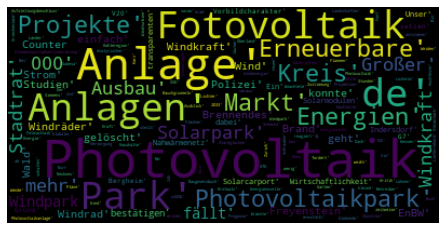

In [155]:
create_wordcloud(str(counts))  # all the words 

+ plot to illustrate all words in the news

#### Add additional stopwords
+ words such as 000, de or punctutations are not providing any useful information  

In [156]:
import string
punctuation = string.punctuation

In [157]:
remove_words = ["de","%","000",]
stopset.update(punctuation,remove_words)

In [158]:
# redefining the without stop words column in our dataset
google_news_df["Without stopwords"] = google_news_df["title"].apply(lambda x: remove_stopwords(x,stopset))
google_news_df.head()

,title,media,date,desc,link,Without stopwords,tokenized
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingeb...,"<a href= ""https://www.baulinks.de/webplugin/20...",Energienovelle Baugesetzbuch,"[Energienovelle, Baugesetzbuch]"
2,Brand bei Freyenstein: Brennendes Windrad – es...,MOZ.de,vor 7 Stunden,Wegen der Höhe konnte die Feuerwehr das Windra...,"<a href= ""https://www.moz.de/lokales/neuruppin...",Brand Freyenstein Brennendes Windrad – konnte ...,"[Brand, Freyenstein, :, Brennendes, Windrad, –..."
3,Studien bestätigen Wirtschaftlichkeit – Unser ...,Windkraft-Journal,vor 10 Stunden,Carport mit Solardach „Besonders gut eignen si...,"<a href= ""https://www.windkraft-journal.de/202...",Studien bestätigen Wirtschaftlichkeit – Unser ...,"[Studien, bestätigen, Wirtschaftlichkeit, –, U..."
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbild...,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in ...,"<a href= ""https://www.windkraft-journal.de/202...",Markt Indersdorf Ein Nahwärmenetz Vorbildchara...,"[Markt, Indersdorf, :, Ein, Nahwärmenetz, Vorb..."
5,Erneuerbare Energien in Bergheim: Grüne wollen...,Kölner Stadt-Anzeiger,vor 12 Stunden,Bergheim. Bis zum Jahr 2032 will das Land Nord...,"<a href= ""https://www.ksta.de/region/rhein-erf...",Erneuerbare Energien Bergheim Grüne Windräder ...,"[Erneuerbare, Energien, Bergheim, :, Grüne, Wi..."


In [159]:
# redefining the tokenizer column in our dataset
google_news_df['tokenized'] = google_news_df["Without stopwords"].apply(lambda x:tokenization(x))
google_news_df.head()

,title,media,date,desc,link,Without stopwords,tokenized
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingeb...,"<a href= ""https://www.baulinks.de/webplugin/20...",Energienovelle Baugesetzbuch,"[Energienovelle, Baugesetzbuch]"
2,Brand bei Freyenstein: Brennendes Windrad – es...,MOZ.de,vor 7 Stunden,Wegen der Höhe konnte die Feuerwehr das Windra...,"<a href= ""https://www.moz.de/lokales/neuruppin...",Brand Freyenstein Brennendes Windrad – konnte ...,"[Brand, Freyenstein, Brennendes, Windrad, –, k..."
3,Studien bestätigen Wirtschaftlichkeit – Unser ...,Windkraft-Journal,vor 10 Stunden,Carport mit Solardach „Besonders gut eignen si...,"<a href= ""https://www.windkraft-journal.de/202...",Studien bestätigen Wirtschaftlichkeit – Unser ...,"[Studien, bestätigen, Wirtschaftlichkeit, –, U..."
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbild...,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in ...,"<a href= ""https://www.windkraft-journal.de/202...",Markt Indersdorf Ein Nahwärmenetz Vorbildchara...,"[Markt, Indersdorf, Ein, Nahwärmenetz, Vorbild..."
5,Erneuerbare Energien in Bergheim: Grüne wollen...,Kölner Stadt-Anzeiger,vor 12 Stunden,Bergheim. Bis zum Jahr 2032 will das Land Nord...,"<a href= ""https://www.ksta.de/region/rhein-erf...",Erneuerbare Energien Bergheim Grüne Windräder ...,"[Erneuerbare, Energien, Bergheim, Grüne, Windr..."


**TFID**

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(google_news_df["Without stopwords"])
print(vectorizer.idf_)
print(vectorizer.vocabulary_) #summarize "

[4.59181774 5.28496492 4.75433667 6.48893773 5.10264337 5.18965474
 5.79579055 5.18965474 6.20125565 5.28496492 5.79579055 5.18965474
 5.10264337 4.06118949 5.50810847 5.64163987 6.48893773 6.48893773
 5.18965474 5.79579055 5.79579055 6.20125565 4.69717826 5.50810847
 6.20125565 5.64163987 5.18965474 5.79579055 4.75433667 4.75433667
 5.79579055 5.79579055 5.9781121  5.79579055 5.10264337 5.39032544
 4.64311104 5.18965474 5.39032544 5.64163987 6.20125565 5.64163987
 5.39032544 5.79579055 5.10264337 5.79579055 4.69717826 5.79579055
 5.02260066 5.39032544 4.69717826 5.79579055 5.79579055 5.79579055
 4.49650756 6.20125565 5.28496492 4.49650756 4.59181774 6.48893773
 5.18965474 5.64163987 5.79579055 5.64163987 3.54449875 5.39032544
 4.49650756 3.9766321  5.50810847 4.69717826 5.39032544 6.20125565
 5.64163987 4.49650756 5.10264337 5.79579055 4.36867419 5.64163987
 6.20125565 4.87949981 5.79579055 6.20125565 5.50810847 5.39032544
 6.48893773 5.79579055 5.50810847 6.20125565 5.79579055 5.2849

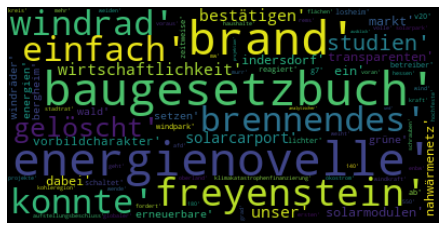

In [161]:
words = []
for i in range(80): # starting 80 words
    words.append(list(vectorizer.vocabulary_.keys())[i])
create_wordcloud(str(words))

+ plot of initial 80 IDF values

In [162]:
# function to get words which have higher idf value than the mean 
def important_words(dictionary):
    imp_words = {}
    result = (sum(dictionary.values()) / len(dictionary)) # mean value of our dictionary 
    for key, value in sorted(dictionary.items()):
        if float(value) > result:
            imp_words.update({key: float(value)})
    return imp_words

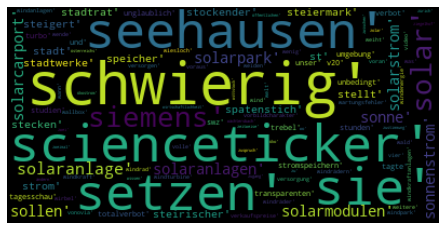

In [163]:
impwords = important_words(vectorizer.vocabulary_)
d = list(impwords.items())[len(impwords)-100:len(impwords)]
create_wordcloud(str(d))

> Plot illustrates the 100 most important terminologies in the news
+ Solar energy and its projects are more in news than wind or any other renewable energy 

### Lemmatizer 

In [164]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# Defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
google_news_df['lemmatized'] = google_news_df['tokenized'].apply(lambda x: lemmatizer(x))
google_news_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,media,date,desc,link,Without stopwords,tokenized,lemmatized
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingeb...,"<a href= ""https://www.baulinks.de/webplugin/20...",Energienovelle Baugesetzbuch,"[Energienovelle, Baugesetzbuch]","[Energienovelle, Baugesetzbuch]"
2,Brand bei Freyenstein: Brennendes Windrad – es...,MOZ.de,vor 7 Stunden,Wegen der Höhe konnte die Feuerwehr das Windra...,"<a href= ""https://www.moz.de/lokales/neuruppin...",Brand Freyenstein Brennendes Windrad – konnte ...,"[Brand, Freyenstein, Brennendes, Windrad, –, k...","[Brand, Freyenstein, Brennendes, Windrad, –, k..."
3,Studien bestätigen Wirtschaftlichkeit – Unser ...,Windkraft-Journal,vor 10 Stunden,Carport mit Solardach „Besonders gut eignen si...,"<a href= ""https://www.windkraft-journal.de/202...",Studien bestätigen Wirtschaftlichkeit – Unser ...,"[Studien, bestätigen, Wirtschaftlichkeit, –, U...","[Studien, bestätigen, Wirtschaftlichkeit, –, U..."
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbild...,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in ...,"<a href= ""https://www.windkraft-journal.de/202...",Markt Indersdorf Ein Nahwärmenetz Vorbildchara...,"[Markt, Indersdorf, Ein, Nahwärmenetz, Vorbild...","[Markt, Indersdorf, Ein, Nahwärmenetz, Vorbild..."
5,Erneuerbare Energien in Bergheim: Grüne wollen...,Kölner Stadt-Anzeiger,vor 12 Stunden,Bergheim. Bis zum Jahr 2032 will das Land Nord...,"<a href= ""https://www.ksta.de/region/rhein-erf...",Erneuerbare Energien Bergheim Grüne Windräder ...,"[Erneuerbare, Energien, Bergheim, Grüne, Windr...","[Erneuerbare, Energien, Bergheim, Grüne, Windr..."


In [165]:
import itertools
lemmatizer_merged = list(itertools.chain(*google_news_df['tokenized']))
lemmatizer_merged

['Energienovelle',
 'Baugesetzbuch',
 'Brand',
 'Freyenstein',
 'Brennendes',
 'Windrad',
 '–',
 'konnte',
 'einfach',
 'gelöscht',
 'Studien',
 'bestätigen',
 'Wirtschaftlichkeit',
 '–',
 'Unser',
 'Solarcarport',
 'transparenten',
 'Solarmodulen',
 'dabei',
 'Markt',
 'Indersdorf',
 'Ein',
 'Nahwärmenetz',
 'Vorbildcharakter',
 'Erneuerbare',
 'Energien',
 'Bergheim',
 'Grüne',
 'Windräder',
 'Wald',
 'setzen',
 'Windpark',
 'Losheim',
 'Betreiber',
 'reagiert',
 'schaltet',
 'Lichter',
 'zeitweise',
 'ab\u200b',
 'V20',
 'G7',
 'Klimakatastrophenfinanzierung',
 'Aufstellungsbeschluss',
 '140-MW-Solarpark',
 'Kohleregion',
 'ERNEUERBARE',
 'ENERGIEN',
 'Ökostrom',
 '1.550',
 'Haushalte',
 'EnBW',
 'weiht',
 'ersten',
 'Solarpark',
 'Hessen',
 'Volle',
 'Wind',
 '-Kraft',
 'voraus',
 '',
 'Energienovelle',
 'Baugesetzbuch',
 'Brand',
 'Freyenstein',
 'Brennendes',
 'Windrad',
 '–',
 'konnte',
 'einfach',
 'gelöscht',
 'Studien',
 'bestätigen',
 'Wirtschaftlichkeit',
 '–',
 'Unser',
 '

In [166]:
lemmatized_word_count = Counter(lemmatizer_merged)
lemmatized_word_count

Counter({'Energienovelle': 17,
         'Baugesetzbuch': 17,
         'Brand': 56,
         'Freyenstein': 43,
         'Brennendes': 36,
         'Windrad': 94,
         '–': 79,
         'konnte': 36,
         'einfach': 36,
         'gelöscht': 36,
         'Studien': 21,
         'bestätigen': 21,
         'Wirtschaftlichkeit': 21,
         'Unser': 21,
         'Solarcarport': 21,
         'transparenten': 21,
         'Solarmodulen': 21,
         'dabei': 21,
         'Markt': 21,
         'Indersdorf': 21,
         'Ein': 21,
         'Nahwärmenetz': 21,
         'Vorbildcharakter': 21,
         'Erneuerbare': 21,
         'Energien': 21,
         'Bergheim': 21,
         'Grüne': 21,
         'Windräder': 63,
         'Wald': 29,
         'setzen': 21,
         'Windpark': 19,
         'Losheim': 19,
         'Betreiber': 19,
         'reagiert': 19,
         'schaltet': 19,
         'Lichter': 19,
         'zeitweise': 19,
         'ab\u200b': 19,
         'V20': 21,
         

In [167]:
# [same for same in lemmatized_word_count if lemmatized_word_count == merged]
# count
# len(lemmatized_word_count && merged)

In [168]:
# len(lemmatized_word_count)

<!--  > Most of lemmatized words(724) are similar as in tokenized words i.e. most of synonyms do not exist -->

 **Parts of speech**
  + categorizes words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.

In [169]:
titles_google = []
desc_google = []
for r in results:
    titles_google.append(r["title"])
    desc_google.append(r['desc'])

In [170]:
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

def pos():
    try:
        for t in titles_google:
            t=str(t)
            words=word_tokenize(t)
            final=nltk.pos_tag(words)
            print(final)
    except Exception as e:
        print(str(e))
       
    
pos()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[]
[('Energienovelle', 'NNP'), ('im', 'NN'), ('Baugesetzbuch', 'NNP')]
[('Brand', 'NNP'), ('bei', 'NN'), ('Freyenstein', 'NNP'), (':', ':'), ('Brennendes', 'NNP'), ('Windrad', 'NNP'), ('–', 'NNP'), ('es', 'VBZ'), ('konnte', 'FW'), ('nicht', 'FW'), ('einfach', 'FW'), ('gelöscht', 'FW'), ('werden', 'NN')]
[('Studien', 'NNP'), ('bestätigen', 'NN'), ('Wirtschaftlichkeit', 'NNP'), ('–', 'NNP'), ('Unser', 'NNP'), ('Solarcarport', 'NNP'), ('mit', 'NN'), ('transparenten', 'NN'), ('Solarmodulen', 'NNP'), ('ist', 'NN'), ('dabei', 'NN'), ('!', '.')]
[('Markt', 'NNP'), ('Indersdorf', 'NNP'), (':', ':'), ('Ein', 'NNP'), ('Nahwärmenetz', 'NNP'), ('mit', 'NN'), ('Vorbildcharakter', 'NNP')]
[('Erneuerbare', 'NNP'), ('Energien', 'NNP'), ('in', 'IN'), ('Bergheim', 'NNP'), (':', ':'), ('Grüne', 'NNP'), ('wollen', 'WRB'), ('Windräder', 'NNP'), ('in', 'IN'), ('den', 'JJ'), ('Wald', 'NNP'), ('setzen', 'NN')]
[('Windpark', 'NNP'), ('Losheim', 'NNP'), (':', ':'), ('Betreiber', 'NNP'), ('reagiert', 'VBP'), ('u

[('Mit', 'NNP'), ('kleinen', 'VBD'), ('Windrädern', 'NNP'), ('Strom', 'NNP'), ('erzeugen', 'NN'), ('–', 'NNP'), ('besser', 'NN'), ('als', 'NNS'), ('Solar', 'NNP'), ('?', '.')]
[('Windkraft', 'NN'), (':', ':'), ('Habeck', 'NNP'), ('schimpft', 'VBD'), ('auf', 'JJ'), ('Länder', 'NNP'), ('-', ':'), ('10.000', 'CD'), ('Megawatt', 'NNP'), ('stecken', 'NN'), ('fest', 'NN')]
[('Stockender', 'NNP'), ('Ausbau', 'NNP'), ('der', 'NN'), ('Windenergie', 'NNP'), (':', ':'), ('Was', 'NNP'), ('sich', 'JJ'), ('ändern', 'NNP'), ('muss', 'NN')]
[]
[('Brand', 'NNP'), ('bei', 'NN'), ('Freyenstein', 'NNP'), (':', ':'), ('Brennendes', 'NNP'), ('Windrad', 'NNP'), ('–', 'NNP'), ('es', 'VBZ'), ('konnte', 'FW'), ('nicht', 'FW'), ('einfach', 'FW'), ('gelöscht', 'FW'), ('werden', 'NN')]
[('Explosiv', 'NN'), ('!', '.'), ('Russische', 'NNP'), ('Granate', 'NNP'), ('bei', 'VBD'), ('Windpark-Bau', 'NNP'), ('ausgehoben', 'NN')]
[('Windpark', 'NNP'), ('Losheim', 'NNP'), (':', ':'), ('Betreiber', 'NNP'), ('reagiert', 'VBP'

[('Globaler', 'NNP'), ('Hochfeste', 'NNP'), ('Schrauben', 'NNP'), ('in', 'IN'), ('der', 'NN'), ('Windkraft-Markt', 'NNP'), ('Analytischer', 'NNP'), ('Ausblick', 'NNP'), (',', ','), ('Projektion', 'NNP'), ('Und', 'NNP'), ('Prognose', 'NNP'), ('Bis', 'NNP'), ('2033', 'CD')]
[('Bei', 'NNP'), ('der', 'NN'), ('Windkraft', 'NNP'), ('läuten', 'NN'), ('in', 'IN'), ('Buch', 'NNP'), ('die', 'NN'), ('Alarmglocken', 'NNP')]
[('V20', 'NNP'), ('und', 'JJ'), ('G7', 'NNP'), ('einigen', 'NN'), ('sich', 'NN'), ('auf', 'NN'), ('Klimakatastrophenfinanzierung', 'NNP')]
[]
[('Griechenland', 'NN'), (':', ':'), ('Erstmals', 'NNS'), ('über', 'NNP'), ('Stunden', 'NNP'), ('Versorgung', 'NNP'), ('aus', 'VBD'), ('100', 'CD'), ('%', 'NN'), ('Ökostrom', 'NN')]
[('Zürich', 'NNS'), (':', ':'), ('Der', 'NNP'), ('Wind', 'NNP'), (',', ','), ('der', 'NN'), ('Wind', 'NNP'), (',', ','), ('Neukoms', 'NNP'), ('Kind', 'NNP')]
[('Siemens', 'NNS'), ('Gamesa', 'NNP'), (':', ':'), ('Windturbine', 'NNP'), ('stellt', 'VBZ'), ('neuen

[('Neue', 'NNP'), ('Windräder', 'NNP'), ('bei', 'NN'), ('Martinshöhe', 'NNP')]
[('Energiewende', 'NN'), (':', ':'), ('Stadt', 'NNP'), ('Elsfleth', 'NNP'), ('macht', 'NN'), ('in', 'IN'), ('Sachen', 'NNP'), ('Windkraft', 'NNP'), ('ihre', 'NN'), ('Hausaufgaben', 'NNP'), ('pünktlich', 'NN')]
[('Nordex', 'NNP'), ('steigert', 'NN'), ('Verkaufspreise', 'NNP'), ('-', ':'), ('Rückgang', 'NNP'), ('bei', 'NN'), ('Auftragseingang', 'NNP'), ('|', 'NNP'), ('proplanta.de', 'NN')]
[]
[('Unglaublich', 'NN'), (':', ':'), ('Dieses', 'VBZ'), ('Windrad', 'NNP'), ('könnte', 'NNP'), ('eine', 'VBP'), ('Familie', 'NNP'), ('allein', 'RB'), ('100', 'CD'), ('Jahre', 'NNP'), ('mit', 'NN'), ('Strom', 'NNP'), ('versorgen', 'NN')]
[('reportnet24.de', 'LS'), ('-', ':'), ('Wittstock/Dosse', 'NNP'), ('-', ':'), ('Windrad', 'NN'), ('in', 'IN'), ('Freyenstein', 'NNP'), ('brennt', 'NN'), ('komplett', 'NN'), ('ab', 'NN')]
[('▶', 'JJ'), ('Millionenschaden', 'NNP'), ('nach', 'NN'), ('Brand', 'NNP'), ('von', 'NNP'), ('Windrad'

[('Großer', 'NNP'), ('Photovoltaikpark', 'NNP'), ('nahe', 'JJ'), ('Belgern', 'NNP'), ('geplant', 'NN'), ('-', ':'), ('Nachrichten', 'NNP'), ('aus', 'VBZ'), ('der', 'JJR'), ('Region', 'NN')]
[('Pläne', 'NNP'), ('für', 'VBD'), ('Agri-Photovoltaik-Park', 'NNP'), ('werden', 'NN'), ('konkreter', 'NN')]
[('Photovoltaikpark', 'NNP'), ('Frauental', 'NNP'), (':', ':'), ('Lenzing', 'NNP'), ('AG', 'NNP'), ('als', 'NNS'), ('Großabnehmer', 'NNP'), ('an', 'DT'), ('Bord', 'NNP')]
[('Energie', 'NNP'), ('Steiermark', 'NNP'), ('errichtet', 'VBD'), ('50.000-Quadratmeter-Photovoltaikpark', 'JJ')]
[('Energie', 'NNP'), ('Steiermark', 'NNP'), ('und', 'JJ'), ('Enery', 'NNP'), ('bauen', 'NN'), ('50.000', 'CD'), ('m²', 'NN'), ('Photovoltaikpark', 'NNP'), ('als', 'VBZ'), ('Grün-Turbo', 'NNP'), ('für', 'NN'), ('heimische', 'NN'), ('Industrie', 'NNP'), ('.', '.'), ('Erster', 'NNP'), ('Kunde', 'NNP'), ('...', ':')]
[('Wächtersbach', 'NN'), (':', ':'), ('Großer', 'NNP'), ('Photovoltaik-Park', 'NNP'), ('bei', 'NN'), 

[('Photovoltaikanlage', 'NNP'), ('mit', 'NN'), ('Wallbox', 'NNP'), (':', ':'), ('Eine', 'NNP'), ('nachhaltige', 'MD'), ('Kombination', 'NNP')]
[('Brand', 'NN'), (':', ':'), ('Mehrere', 'NNP'), ('Feuer', 'NNP'), ('im', 'NN'), ('Harz', 'NNP'), (':', ':'), ('Scheune', 'NNP'), ('mit', 'NN'), ('Photovoltaikanlage', 'NNP'), ('geht', 'NN'), ('in', 'IN'), ('Flammen', 'NNP'), ('auf', 'NN')]
[('Preise', 'NNP'), ('explodieren', 'NN'), (':', ':'), ('Experte', 'NN'), ('in', 'IN'), ('Oberberg', 'NNP'), ('rät', 'NN'), ('von', 'NN'), ('Kauf', 'NNP'), ('einer', 'NN'), ('Photovoltaikanlage', 'NNP'), ('ab', 'NN')]
[('EEG', 'JJ'), ('2023', 'CD'), (':', ':'), ('Höhere', 'NNP'), ('Förderungen', 'NNP'), ('für', 'VBD'), ('Photovoltaik-Anlagen', 'NNP'), ('-', ':'), ('das', 'NN'), ('müssen', 'FW'), ('Eigenheimbesitzer', 'NNP'), ('wissen', 'NN')]
[('Photovoltaik', 'NNP'), ('mieten', 'NN'), (':', ':'), ('Ohne', 'NNP'), ('Risiko', 'NNP'), ('und', 'NN'), ('Anschaffungskosten', 'NNP'), ('Richtung', 'NNP'), ('Energie

[('Zwischen', 'NNP'), ('Ziegelhof', 'NNP'), ('und', 'IN'), ('Buchenhüll', 'NNP'), ('sollen', 'FW'), ('im', 'NN'), ('Wald', 'NNP'), ('vier', 'JJR'), ('Windpark-Anlagen', 'NN'), ('entstehen', 'NN')]
[('Main-Kinzig-Kreis', 'NN'), (':', ':'), ('Installation', 'NN'), ('der', 'NN'), ('Windräder', 'NNP'), ('am', 'VBP'), ('Brandenstein', 'NNP'), ('beginnt', 'NN')]
[('Fünf', 'NNP'), ('Windräder', 'NNP'), ('für', 'NN'), ('Brand', 'NNP')]
[('Windräder', 'NNP'), ('auf', 'NN'), ('dem', 'NN'), ('Dillenburger', 'NNP'), ('Gaulskopf', 'NNP'), ('?', '.')]
[('Neue', 'NNP'), ('Windräder', 'NNP'), ('bei', 'NN'), ('Martinshöhe', 'NNP')]
[('Energiewende', 'NN'), (':', ':'), ('Stadt', 'NNP'), ('Elsfleth', 'NNP'), ('macht', 'NN'), ('in', 'IN'), ('Sachen', 'NNP'), ('Windkraft', 'NNP'), ('ihre', 'NN'), ('Hausaufgaben', 'NNP'), ('pünktlich', 'NN')]
[('Nordex', 'NNP'), ('steigert', 'NN'), ('Verkaufspreise', 'NNP'), ('-', ':'), ('Rückgang', 'NNP'), ('bei', 'NN'), ('Auftragseingang', 'NNP'), ('|', 'NNP'), ('proplant

[('Wiesloch', 'NN'), (':', ':'), ('Interesse', 'NNP'), ('an', 'DT'), ('Fotovoltaik', 'NNP'), ('ist', 'NN'), ('groß', 'NN'), ('-', ':'), ('Rhein-Neckar', 'JJ'), ('-', ':'), ('Nachrichten', 'NNP'), ('und', 'JJ'), ('Aktuelles', 'NNP'), ('aus', 'NN'), ('der', 'NN'), ('Region', 'NN')]
[('Neckargemünd', 'NN'), (':', ':'), ('Fällt', 'NNP'), ('das', 'VBZ'), ('Fotovoltaik-Verbot', 'NNP'), ('für', 'NN'), ('die', 'NN'), ('Altstadt', 'NNP'), ('?', '.')]
[('Neue', 'JJ'), ('Fotovoltaik-Anlage', 'NN'), (':', ':'), ('Was', 'NNP'), ('man', 'NN'), ('berücksichtigen', 'NN'), ('muss', 'SYM'), ('-', ':'), ('SWZ', 'NN')]
[('Fotovoltaik', 'NNP'), ('für', 'NN'), ('mehr', 'NN'), ('Autarkie', 'NNP')]
[]
[('Großflächenprojekte', 'NN'), (':', ':'), ('Wo', 'NNP'), ('landen', 'VBZ'), ('die', 'NN'), ('großen', 'NN'), ('Fotovoltaikparks', 'NNP'), ('?', '.'), ('-', ':'), ('Graz-Umgebung', 'NN')]
[('St.', 'NNP'), ('Peter', 'NNP'), ('ob', 'MD'), ('Judenburg', 'NNP'), (':', ':'), ('Neuer', 'NNP'), ('Fotovoltaikpark', 'NN

[]
[('Zustimmung', 'NNP'), ('mit', 'NN'), ('„', 'NNP'), ('Bauchgrummeln', 'NNP'), ('“', 'NN')]
[('Der', 'NNP'), ('Stadtrat', 'NNP'), ('tagte', 'NN'), (':', ':'), ('Unbedingt', 'NNP'), ('mehr', 'MD'), ('Grün', 'NNP'), ('für', 'VB'), ('Seehausen', 'NNP'), ('+', 'NNP'), ('Video', 'NNP'), ('⋆', 'NNP'), ('Nachrichten', 'NNP'), ('aus', 'VBZ'), ('Leipzig', 'NNP')]
[('Speicher', 'NNP'), ('nutzt', 'CC'), ('jetzt', 'NN'), ('noch', 'JJ'), ('mehr', 'NN'), ('Sonne', 'NNP'), ('vom', 'NN'), ('Dach', 'NNP')]
[('Photovoltaikanlage', 'NNP'), ('mit', 'NN'), ('Wallbox', 'NNP'), (':', ':'), ('Eine', 'NNP'), ('nachhaltige', 'MD'), ('Kombination', 'NNP')]
[('Brand', 'NN'), (':', ':'), ('Mehrere', 'NNP'), ('Feuer', 'NNP'), ('im', 'NN'), ('Harz', 'NNP'), (':', ':'), ('Scheune', 'NNP'), ('mit', 'NN'), ('Photovoltaikanlage', 'NNP'), ('geht', 'NN'), ('in', 'IN'), ('Flammen', 'NNP'), ('auf', 'NN')]
[('Preise', 'NNP'), ('explodieren', 'NN'), (':', ':'), ('Experte', 'NN'), ('in', 'IN'), ('Oberberg', 'NNP'), ('rät', 

**Chunking**
+ extractes phrases from unstructured text

In [171]:
def process_content():
    try:
        for t in titles_google:
            t=str(t)
            words=word_tokenize(t)
            final=nltk.pos_tag(words)
            chunkGram=r"""Chunk: {<RB.?>*<VB.?>*<NNP><NN>?}"""
            chunkParser=nltk.RegexpParser(chunkGram)
            chunked=chunkParser.parse(final)
            print(chunked)
    except Exception as e:
        print(str(e))
        
process_content()

(S )
(S (Chunk Energienovelle/NNP im/NN) (Chunk Baugesetzbuch/NNP))
(S
  (Chunk Brand/NNP bei/NN)
  (Chunk Freyenstein/NNP)
  :/:
  (Chunk Brennendes/NNP)
  (Chunk Windrad/NNP)
  (Chunk –/NNP)
  es/VBZ
  konnte/FW
  nicht/FW
  einfach/FW
  gelöscht/FW
  werden/NN)
(S
  (Chunk Studien/NNP bestätigen/NN)
  (Chunk Wirtschaftlichkeit/NNP)
  (Chunk –/NNP)
  (Chunk Unser/NNP)
  (Chunk Solarcarport/NNP mit/NN)
  transparenten/NN
  (Chunk Solarmodulen/NNP ist/NN)
  dabei/NN
  !/.)
(S
  (Chunk Markt/NNP)
  (Chunk Indersdorf/NNP)
  :/:
  (Chunk Ein/NNP)
  (Chunk Nahwärmenetz/NNP mit/NN)
  (Chunk Vorbildcharakter/NNP))
(S
  (Chunk Erneuerbare/NNP)
  (Chunk Energien/NNP)
  in/IN
  (Chunk Bergheim/NNP)
  :/:
  (Chunk Grüne/NNP)
  wollen/WRB
  (Chunk Windräder/NNP)
  in/IN
  den/JJ
  (Chunk Wald/NNP setzen/NN))
(S
  (Chunk Windpark/NNP)
  (Chunk Losheim/NNP)
  :/:
  (Chunk Betreiber/NNP)
  reagiert/VBP
  und/JJ
  schaltet/NN
  (Chunk Lichter/NNP zeitweise/NN)
  ab​/NN)
(S
  (Chunk V20/NNP)
  und/JJ


  werden/NN)
(S
  (Chunk Studien/NNP bestätigen/NN)
  (Chunk Wirtschaftlichkeit/NNP)
  (Chunk –/NNP)
  (Chunk Unser/NNP)
  (Chunk Solarcarport/NNP mit/NN)
  transparenten/NN
  (Chunk Solarmodulen/NNP ist/NN)
  dabei/NN
  !/.)
(S
  (Chunk Markt/NNP)
  (Chunk Indersdorf/NNP)
  :/:
  (Chunk Ein/NNP)
  (Chunk Nahwärmenetz/NNP mit/NN)
  (Chunk Vorbildcharakter/NNP))
(S
  (Chunk Projekte/NNP)
  im/JJ
  (Chunk Rems-Murr-Kreis/NNP)
  :/:
  (Chunk EnBW/NNP geht/NN)
  bei/NN
  (Chunk Windkraft/NNP voran/NN))
(S
  (Chunk Mehr/NNP)
  (Chunk Flächen/NNP)
  (Chunk für/VBZ Windräder/NNP im/NN)
  (Chunk Oberland/NNP)
  ?/.)
(S
  (Chunk Erneuerbare/NNP)
  (Chunk Energien/NNP)
  in/IN
  (Chunk Bergheim/NNP)
  :/:
  (Chunk Grüne/NNP)
  wollen/WRB
  (Chunk Windräder/NNP)
  in/IN
  den/JJ
  (Chunk Wald/NNP setzen/NN))
(S
  (Chunk Globaler/NNP)
  (Chunk Hochfeste/NNP)
  (Chunk Schrauben/NNP)
  in/IN
  der/NN
  (Chunk Windkraft-Markt/NNP)
  (Chunk Analytischer/NNP)
  (Chunk Ausblick/NNP)
  ,/,
  (Chunk Proje

(S
  (Chunk Studien/NNP bestätigen/NN)
  (Chunk Wirtschaftlichkeit/NNP)
  (Chunk –/NNP)
  (Chunk Unser/NNP)
  (Chunk Solarcarport/NNP mit/NN)
  transparenten/NN
  (Chunk Solarmodulen/NNP ist/NN)
  dabei/NN
  !/.)
(S
  (Chunk Markt/NNP)
  (Chunk Indersdorf/NNP)
  :/:
  (Chunk Ein/NNP)
  (Chunk Nahwärmenetz/NNP mit/NN)
  (Chunk Vorbildcharakter/NNP))
(S
  (Chunk Erneuerbare/NNP)
  (Chunk Energien/NNP)
  in/IN
  (Chunk Bergheim/NNP)
  :/:
  (Chunk Grüne/NNP)
  wollen/WRB
  (Chunk Windräder/NNP)
  in/IN
  den/JJ
  (Chunk Wald/NNP setzen/NN))
(S
  (Chunk Windpark/NNP)
  (Chunk Losheim/NNP)
  :/:
  (Chunk Betreiber/NNP)
  reagiert/VBP
  und/JJ
  schaltet/NN
  (Chunk Lichter/NNP zeitweise/NN)
  ab​/NN)
(S
  (Chunk V20/NNP)
  und/JJ
  (Chunk G7/NNP einigen/NN)
  sich/NN
  auf/NN
  (Chunk Klimakatastrophenfinanzierung/NNP))
(S
  (Chunk Aufstellungsbeschluss/NNP)
  für/VBD
  140-MW-Solarpark/JJ
  in/IN
  (Chunk Kohleregion/NNP)
  -/:
  ERNEUERBARE/NN
  (Chunk ENERGIEN/NNP))
(S
  Ökostrom/IN
  fü

  (Chunk Klimakatastrophenfinanzierung/NNP))
(S )
(S
  Griechenland/NN
  :/:
  Erstmals/NNS
  (Chunk über/NNP)
  (Chunk Stunden/NNP)
  (Chunk Versorgung/NNP)
  aus/VBD
  100/CD
  %/NN
  Ökostrom/NN)
(S
  Zürich/NNS
  :/:
  (Chunk Der/NNP)
  (Chunk Wind/NNP)
  ,/,
  der/NN
  (Chunk Wind/NNP)
  ,/,
  (Chunk Neukoms/NNP)
  (Chunk Kind/NNP))
(S
  Siemens/NNS
  (Chunk Gamesa/NNP)
  :/:
  (Chunk Windturbine/NNP)
  stellt/VBZ
  neuen/JJ
  24h-Lieferrekord/JJ
  auf/NN)
(S
  (Chunk Lohnen/NNP)
  sich/JJ
  kleine/NN
  (Chunk Windanlagen/NNP im/NN)
  (Chunk Garten/NNP)
  ?/.)
(S
  (Chunk Kritik/NNP)
  an/DT
  Windkraftanlagen/NN
  :/:
  (Chunk Keine/NNP)
  (Chunk Ressourcenfresser/NNP)
  und/IN
  (Chunk Giftschleudern/NNP)
  (Chunk |/NNP tagesschau.de/NN))
(S
  (Chunk Windenergie/NNP)
  fürs/JJ
  eigene/NN
  (Chunk Haus/NNP)
  -/:
  (Chunk Wann/NNP)
  sich/JJ
  ein/NN
  (Chunk Windrad/NNP für/NN)
  (Chunk Sie/NNP lohnt/NN))
(S
  Zürich/NNS
  :/:
  (Chunk Pläne/NNP)
  (Chunk für/VBD Windkraft-Ausb

  2033/CD)
(S
  (Chunk Bei/NNP der/NN)
  (Chunk Windkraft/NNP läuten/NN)
  in/IN
  (Chunk Buch/NNP die/NN)
  (Chunk Alarmglocken/NNP))
(S
  (Chunk V20/NNP)
  und/JJ
  (Chunk G7/NNP einigen/NN)
  sich/NN
  auf/NN
  (Chunk Klimakatastrophenfinanzierung/NNP))
(S )
(S
  Griechenland/NN
  :/:
  Erstmals/NNS
  (Chunk über/NNP)
  (Chunk Stunden/NNP)
  (Chunk Versorgung/NNP)
  aus/VBD
  100/CD
  %/NN
  Ökostrom/NN)
(S
  Zürich/NNS
  :/:
  (Chunk Der/NNP)
  (Chunk Wind/NNP)
  ,/,
  der/NN
  (Chunk Wind/NNP)
  ,/,
  (Chunk Neukoms/NNP)
  (Chunk Kind/NNP))
(S
  Siemens/NNS
  (Chunk Gamesa/NNP)
  :/:
  (Chunk Windturbine/NNP)
  stellt/VBZ
  neuen/JJ
  24h-Lieferrekord/JJ
  auf/NN)
(S
  (Chunk Lohnen/NNP)
  sich/JJ
  kleine/NN
  (Chunk Windanlagen/NNP im/NN)
  (Chunk Garten/NNP)
  ?/.)
(S
  (Chunk Kritik/NNP)
  an/DT
  Windkraftanlagen/NN
  :/:
  (Chunk Keine/NNP)
  (Chunk Ressourcenfresser/NNP)
  und/IN
  (Chunk Giftschleudern/NNP)
  (Chunk |/NNP tagesschau.de/NN))
(S
  (Chunk Windenergie/NNP)
  f

  (Chunk Vorbildcharakter/NNP))
(S
  (Chunk Projekte/NNP)
  im/JJ
  (Chunk Rems-Murr-Kreis/NNP)
  :/:
  (Chunk EnBW/NNP geht/NN)
  bei/NN
  (Chunk Windkraft/NNP voran/NN))
(S
  (Chunk Mehr/NNP)
  (Chunk Flächen/NNP)
  (Chunk für/VBZ Windräder/NNP im/NN)
  (Chunk Oberland/NNP)
  ?/.)
(S
  (Chunk Erneuerbare/NNP)
  (Chunk Energien/NNP)
  in/IN
  (Chunk Bergheim/NNP)
  :/:
  (Chunk Grüne/NNP)
  wollen/WRB
  (Chunk Windräder/NNP)
  in/IN
  den/JJ
  (Chunk Wald/NNP setzen/NN))
(S
  (Chunk Globaler/NNP)
  (Chunk Hochfeste/NNP)
  (Chunk Schrauben/NNP)
  in/IN
  der/NN
  (Chunk Windkraft-Markt/NNP)
  (Chunk Analytischer/NNP)
  (Chunk Ausblick/NNP)
  ,/,
  (Chunk Projektion/NNP)
  (Chunk Und/NNP)
  (Chunk Prognose/NNP)
  (Chunk Bis/NNP)
  2033/CD)
(S
  (Chunk Bei/NNP der/NN)
  (Chunk Windkraft/NNP läuten/NN)
  in/IN
  (Chunk Buch/NNP die/NN)
  (Chunk Alarmglocken/NNP))
(S
  (Chunk V20/NNP)
  und/JJ
  (Chunk G7/NNP einigen/NN)
  sich/NN
  auf/NN
  (Chunk Klimakatastrophenfinanzierung/NNP))
(S )


(S
  (Chunk Aufstellungsbeschluss/NNP)
  für/VBD
  140-MW-Solarpark/JJ
  in/IN
  (Chunk Kohleregion/NNP)
  -/:
  ERNEUERBARE/NN
  (Chunk ENERGIEN/NNP))
(S
  Ökostrom/IN
  für/JJ
  1.550/CD
  Haushalte/NN
  :/:
  (Chunk EnBW/NNP)
  weiht/VBZ
  ihren/NNS
  ersten/JJ
  (Chunk Solarpark/NNP)
  in/IN
  (Chunk Hessen/NNP ein/NN))
(S (Chunk Volle/NNP) (/( (Chunk Wind/NNP) )/) -Kraft/NN voraus/NN)
(S )
(S
  (Chunk AfD-Stadtrat/NNP)
  fordert/JJ
  180-Grad-Wende/JJ
  bei/NN
  (Chunk Windkraft/NNP)
  in/IN
  (Chunk Weiden/NNP))
(S
  (Chunk Brand/NNP bei/NN)
  (Chunk Freyenstein/NNP)
  :/:
  (Chunk Brennendes/NNP)
  (Chunk Windrad/NNP)
  (Chunk –/NNP)
  es/VBZ
  konnte/FW
  nicht/FW
  einfach/FW
  gelöscht/FW
  werden/NN)
(S
  (Chunk Studien/NNP bestätigen/NN)
  (Chunk Wirtschaftlichkeit/NNP)
  (Chunk –/NNP)
  (Chunk Unser/NNP)
  (Chunk Solarcarport/NNP mit/NN)
  transparenten/NN
  (Chunk Solarmodulen/NNP ist/NN)
  dabei/NN
  !/.)
(S
  (Chunk Markt/NNP)
  (Chunk Indersdorf/NNP)
  :/:
  (Chunk Ein

(S
  „/JJ
  (Chunk Fotovoltaik/NNP und/NN)
  (Chunk Denkmalschutz/NNP)
  :/:
  (Chunk Totalverbot/NNP)
  fällt/VBZ
  “/NN)
(S
  Fotovoltaik/NN
  :/:
  23/CD
  (Chunk Anlagen/NNP auf/NN)
  (Chunk öffentlichen/NNP)
  (Chunk Gebäuden/NNP)
  -/:
  (Chunk Frankenthal/NNP)
  -/:
  (Chunk DIE/NNP)
  (Chunk RHEINPFALZ/NNP))
(S
  (Chunk Dreieinhalb/NNP)
  (Chunk Hektar/NNP)
  (Chunk Fotovoltaik/NNP auf/NN)
  (Chunk Hügel/NNP)
  in/IN
  der/NN
  (Chunk Buckligen/NNP)
  (Chunk Welt/NNP))
(S
  (Chunk Rat/NNP)
  (Chunk Trebel/NNP)
  :/:
  (Chunk Ja/NNP)
  (Chunk zu/NNP)
  (Chunk zweimal/NNP)
  (Chunk Fotovoltaik/NNP))
(S
  (Chunk Forderung/NNP der/NN)
  Länder/NN
  :/:
  (Chunk Zugang/NNP)
  (Chunk zu/VBD Photovoltaik-Förderung/NNP soll/NN)
  einfacher/RB
  werden/JJ)
(S
  Wiesloch/NN
  :/:
  (Chunk Interesse/NNP)
  an/DT
  (Chunk Fotovoltaik/NNP ist/NN)
  groß/NN
  -/:
  Rhein-Neckar/JJ
  -/:
  (Chunk Nachrichten/NNP)
  und/JJ
  (Chunk Aktuelles/NNP aus/NN)
  der/NN
  Region/NN)
(S
  Neckargemünd/

(S
  (Chunk Baubeginn/NNP im/NN)
  (Chunk Herbst/NNP)
  :/:
  Rosental/JJ
  plant/NN
  zwei/NN
  weitere/WRB
  Photovoltaik-Projekte/NN)
(S
  (Chunk Solarstrom/NNP im/NN)
  (Chunk Schatten/NNP)
  (Chunk des/VBZ Mehrumer/NNP)
  (Chunk Kohlekraftwerks/NNP))
(S )
(S
  (Chunk Zustimmung/NNP mit/NN)
  (Chunk „/NNP)
  (Chunk Bauchgrummeln/NNP “/NN))
(S
  (Chunk Der/NNP)
  (Chunk Stadtrat/NNP tagte/NN)
  :/:
  (Chunk Unbedingt/NNP)
  mehr/MD
  (Chunk Grün/NNP)
  (Chunk für/VB Seehausen/NNP)
  (Chunk +/NNP)
  (Chunk Video/NNP)
  (Chunk ⋆/NNP)
  (Chunk Nachrichten/NNP)
  (Chunk aus/VBZ Leipzig/NNP))
(S
  (Chunk Speicher/NNP)
  nutzt/CC
  jetzt/NN
  noch/JJ
  mehr/NN
  (Chunk Sonne/NNP vom/NN)
  (Chunk Dach/NNP))
(S
  (Chunk Photovoltaikanlage/NNP mit/NN)
  (Chunk Wallbox/NNP)
  :/:
  (Chunk Eine/NNP)
  nachhaltige/MD
  (Chunk Kombination/NNP))
(S
  Brand/NN
  :/:
  (Chunk Mehrere/NNP)
  (Chunk Feuer/NNP im/NN)
  (Chunk Harz/NNP)
  :/:
  (Chunk Scheune/NNP mit/NN)
  (Chunk Photovoltaikanlage/NNP

 **Chinking**
 -  removes unwanted chunks from the chunking

In [172]:
def process_content():
    try:
        for t in titles_google:
            t=str(t)
            words=word_tokenize(t)
            final=nltk.pos_tag(words)
            chunkGram=r"""Chunk: {<.*>+}
                        }<VB.?|IN|DT>+{"""
            chunkParser=nltk.RegexpParser(chunkGram)
            chunked=chunkParser.parse(final)
            print(chunked)
    except Exception as e:
        print(str(e))
        
process_content()

(S )
(S (Chunk Energienovelle/NNP im/NN Baugesetzbuch/NNP))
(S
  (Chunk
    Brand/NNP
    bei/NN
    Freyenstein/NNP
    :/:
    Brennendes/NNP
    Windrad/NNP
    –/NNP)
  es/VBZ
  (Chunk konnte/FW nicht/FW einfach/FW gelöscht/FW werden/NN))
(S
  (Chunk
    Studien/NNP
    bestätigen/NN
    Wirtschaftlichkeit/NNP
    –/NNP
    Unser/NNP
    Solarcarport/NNP
    mit/NN
    transparenten/NN
    Solarmodulen/NNP
    ist/NN
    dabei/NN
    !/.))
(S
  (Chunk
    Markt/NNP
    Indersdorf/NNP
    :/:
    Ein/NNP
    Nahwärmenetz/NNP
    mit/NN
    Vorbildcharakter/NNP))
(S
  (Chunk Erneuerbare/NNP Energien/NNP)
  in/IN
  (Chunk Bergheim/NNP :/: Grüne/NNP wollen/WRB Windräder/NNP)
  in/IN
  (Chunk den/JJ Wald/NNP setzen/NN))
(S
  (Chunk Windpark/NNP Losheim/NNP :/: Betreiber/NNP)
  reagiert/VBP
  (Chunk und/JJ schaltet/NN Lichter/NNP zeitweise/NN ab​/NN))
(S
  (Chunk
    V20/NNP
    und/JJ
    G7/NNP
    einigen/NN
    sich/NN
    auf/NN
    Klimakatastrophenfinanzierung/NNP))
(S
  (Chunk Au

(S
  Ökostrom/IN
  (Chunk für/JJ 1.550/CD Haushalte/NN :/: EnBW/NNP)
  weiht/VBZ
  (Chunk ihren/NNS ersten/JJ Solarpark/NNP)
  in/IN
  (Chunk Hessen/NNP ein/NN))
(S (Chunk Volle/NNP (/( Wind/NNP )/) -Kraft/NN voraus/NN))
(S )
(S
  (Chunk
    AfD-Stadtrat/NNP
    fordert/JJ
    180-Grad-Wende/JJ
    bei/NN
    Windkraft/NNP)
  in/IN
  (Chunk Weiden/NNP))
(S
  (Chunk
    Brand/NNP
    bei/NN
    Freyenstein/NNP
    :/:
    Brennendes/NNP
    Windrad/NNP
    –/NNP)
  es/VBZ
  (Chunk konnte/FW nicht/FW einfach/FW gelöscht/FW werden/NN))
(S
  (Chunk
    Studien/NNP
    bestätigen/NN
    Wirtschaftlichkeit/NNP
    –/NNP
    Unser/NNP
    Solarcarport/NNP
    mit/NN
    transparenten/NN
    Solarmodulen/NNP
    ist/NN
    dabei/NN
    !/.))
(S
  (Chunk
    Markt/NNP
    Indersdorf/NNP
    :/:
    Ein/NNP
    Nahwärmenetz/NNP
    mit/NN
    Vorbildcharakter/NNP))
(S
  (Chunk
    Projekte/NNP
    im/JJ
    Rems-Murr-Kreis/NNP
    :/:
    EnBW/NNP
    geht/NN
    bei/NN
    Windkraft/NNP
    vor

(S
  (Chunk
    Brand/NNP
    bei/NN
    Freyenstein/NNP
    :/:
    Brennendes/NNP
    Windrad/NNP
    –/NNP)
  es/VBZ
  (Chunk konnte/FW nicht/FW einfach/FW gelöscht/FW werden/NN))
(S
  (Chunk
    Projekte/NNP
    im/JJ
    Rems-Murr-Kreis/NNP
    :/:
    EnBW/NNP
    geht/NN
    bei/NN
    Windkraft/NNP
    voran/NN))
(S
  (Chunk Bei/NNP der/NN Windkraft/NNP läuten/NN)
  in/IN
  (Chunk Buch/NNP die/NN Alarmglocken/NNP))
(S (Chunk Windrad/NNP brannte/NN :/: Polizei/NNP) ermittelt/VBD)
(S (Chunk Windrad/NNP brannte/NN :/: Polizei/NNP) ermittelt/VBD)
(S
  (Chunk
    Ostprignitz-Ruppin/NN
    :/:
    Windrad/JJ
    brannte/NN
    :/:
    Polizei/NNP)
  ermittelt/VBD)
(S )
(S (Chunk Energienovelle/NNP im/NN Baugesetzbuch/NNP))
(S
  (Chunk
    Brand/NNP
    bei/NN
    Freyenstein/NNP
    :/:
    Brennendes/NNP
    Windrad/NNP
    –/NNP)
  es/VBZ
  (Chunk konnte/FW nicht/FW einfach/FW gelöscht/FW werden/NN))
(S
  (Chunk
    Studien/NNP
    bestätigen/NN
    Wirtschaftlichkeit/NNP
    –/NNP

(S )
(S
  (Chunk
    AfD-Stadtrat/NNP
    fordert/JJ
    180-Grad-Wende/JJ
    bei/NN
    Windkraft/NNP)
  in/IN
  (Chunk Weiden/NNP))
(S
  (Chunk
    Brand/NNP
    bei/NN
    Freyenstein/NNP
    :/:
    Brennendes/NNP
    Windrad/NNP
    –/NNP)
  es/VBZ
  (Chunk konnte/FW nicht/FW einfach/FW gelöscht/FW werden/NN))
(S
  (Chunk
    Studien/NNP
    bestätigen/NN
    Wirtschaftlichkeit/NNP
    –/NNP
    Unser/NNP
    Solarcarport/NNP
    mit/NN
    transparenten/NN
    Solarmodulen/NNP
    ist/NN
    dabei/NN
    !/.))
(S
  (Chunk
    Markt/NNP
    Indersdorf/NNP
    :/:
    Ein/NNP
    Nahwärmenetz/NNP
    mit/NN
    Vorbildcharakter/NNP))
(S
  (Chunk
    Projekte/NNP
    im/JJ
    Rems-Murr-Kreis/NNP
    :/:
    EnBW/NNP
    geht/NN
    bei/NN
    Windkraft/NNP
    voran/NN))
(S
  (Chunk Mehr/NNP Flächen/NNP)
  für/VBZ
  (Chunk Windräder/NNP im/NN Oberland/NNP ?/.))
(S
  (Chunk Erneuerbare/NNP Energien/NNP)
  in/IN
  (Chunk Bergheim/NNP :/: Grüne/NNP wollen/WRB Windräder/NNP)
  in/IN
 

(S
  (Chunk
    Windenergie/NNP
    fürs/JJ
    eigene/NN
    Haus/NNP
    -/:
    Wann/NNP
    sich/JJ
    ein/NN
    Windrad/NNP
    für/NN
    Sie/NNP
    lohnt/NN))
(S
  (Chunk Zürich/NNS :/: Pläne/NNP)
  für/VBD
  (Chunk
    Windkraft-Ausbau/NNP
    liegen/NN
    vor/NN
    ,/,
    es/JJ
    gibt/NN
    Kritik/NNP))
(S
  (Chunk Mit/NNP)
  kleinen/VBD
  (Chunk
    Windrädern/NNP
    Strom/NNP
    erzeugen/NN
    –/NNP
    besser/NN
    als/NNS
    Solar/NNP
    ?/.))
(S
  (Chunk Windkraft/NN :/: Habeck/NNP)
  schimpft/VBD
  (Chunk
    auf/JJ
    Länder/NNP
    -/:
    10.000/CD
    Megawatt/NNP
    stecken/NN
    fest/NN))
(S
  (Chunk
    Stockender/NNP
    Ausbau/NNP
    der/NN
    Windenergie/NNP
    :/:
    Was/NNP
    sich/JJ
    ändern/NNP
    muss/NN))
(S )
(S
  (Chunk
    Brand/NNP
    bei/NN
    Freyenstein/NNP
    :/:
    Brennendes/NNP
    Windrad/NNP
    –/NNP)
  es/VBZ
  (Chunk konnte/FW nicht/FW einfach/FW gelöscht/FW werden/NN))
(S
  (Chunk Explosiv/NN !/. Russische/N

(S
  (Chunk
    Lohnen/NNP
    sich/JJ
    kleine/NN
    Windanlagen/NNP
    im/NN
    Garten/NNP
    ?/.))
(S
  (Chunk Kritik/NNP)
  an/DT
  (Chunk Windkraftanlagen/NN :/: Keine/NNP Ressourcenfresser/NNP)
  und/IN
  (Chunk Giftschleudern/NNP |/NNP tagesschau.de/NN))
(S
  (Chunk
    Windenergie/NNP
    fürs/JJ
    eigene/NN
    Haus/NNP
    -/:
    Wann/NNP
    sich/JJ
    ein/NN
    Windrad/NNP
    für/NN
    Sie/NNP
    lohnt/NN))
(S
  (Chunk Zürich/NNS :/: Pläne/NNP)
  für/VBD
  (Chunk
    Windkraft-Ausbau/NNP
    liegen/NN
    vor/NN
    ,/,
    es/JJ
    gibt/NN
    Kritik/NNP))
(S
  (Chunk Mit/NNP)
  kleinen/VBD
  (Chunk
    Windrädern/NNP
    Strom/NNP
    erzeugen/NN
    –/NNP
    besser/NN
    als/NNS
    Solar/NNP
    ?/.))
(S
  (Chunk Windkraft/NN :/: Habeck/NNP)
  schimpft/VBD
  (Chunk
    auf/JJ
    Länder/NNP
    -/:
    10.000/CD
    Megawatt/NNP
    stecken/NN
    fest/NN))
(S
  (Chunk
    Stockender/NNP
    Ausbau/NNP
    der/NN
    Windenergie/NNP
    :/:
    Was/NNP


  (Chunk Windräder/NNP im/NN Oberland/NNP ?/.))
(S
  (Chunk Erneuerbare/NNP Energien/NNP)
  in/IN
  (Chunk Bergheim/NNP :/: Grüne/NNP wollen/WRB Windräder/NNP)
  in/IN
  (Chunk den/JJ Wald/NNP setzen/NN))
(S
  (Chunk Globaler/NNP Hochfeste/NNP Schrauben/NNP)
  in/IN
  (Chunk
    der/NN
    Windkraft-Markt/NNP
    Analytischer/NNP
    Ausblick/NNP
    ,/,
    Projektion/NNP
    Und/NNP
    Prognose/NNP
    Bis/NNP
    2033/CD))
(S
  (Chunk Bei/NNP der/NN Windkraft/NNP läuten/NN)
  in/IN
  (Chunk Buch/NNP die/NN Alarmglocken/NNP))
(S
  (Chunk
    V20/NNP
    und/JJ
    G7/NNP
    einigen/NN
    sich/NN
    auf/NN
    Klimakatastrophenfinanzierung/NNP))
(S )
(S
  (Chunk
    Griechenland/NN
    :/:
    Erstmals/NNS
    über/NNP
    Stunden/NNP
    Versorgung/NNP)
  aus/VBD
  (Chunk 100/CD %/NN Ökostrom/NN))
(S
  (Chunk
    Zürich/NNS
    :/:
    Der/NNP
    Wind/NNP
    ,/,
    der/NN
    Wind/NNP
    ,/,
    Neukoms/NNP
    Kind/NNP))
(S
  (Chunk Siemens/NNS Gamesa/NNP :/: Windturbine/NNP

  (Chunk Fotovoltaik-Park/NNP))
(S
  (Chunk Finanzierung/NNP von/NNP Fotovoltaikparks/NNP)
  auf/VBD
  (Chunk Mallorca/NNP abgeschlossen/NN))
(S
  In/IN
  (Chunk Rochau/NNP oll/NN ein/RB Fotovoltaik-Park/NNP entstehen/NN))
(S
  (Chunk
    Wirbel/NNP
    um/JJ
    Öko-Projekt/JJ
    -/:
    Riesige/JJ
    Biogas-Anlage/JJ
    im/NN
    Naherholungsgebiet/NNP
    |/NNP
    krone.at/NN))
(S
  (Chunk Doppelte/NNP Ernte/NNP)
  aus/VBZ
  (Chunk dem/NN Fotovoltaikpark/NNP))
(S )
(S (Chunk Energienovelle/NNP im/NN Baugesetzbuch/NNP))
(S
  (Chunk
    Brand/NNP
    bei/NN
    Freyenstein/NNP
    :/:
    Brennendes/NNP
    Windrad/NNP
    –/NNP)
  es/VBZ
  (Chunk konnte/FW nicht/FW einfach/FW gelöscht/FW werden/NN))
(S
  (Chunk
    Studien/NNP
    bestätigen/NN
    Wirtschaftlichkeit/NNP
    –/NNP
    Unser/NNP
    Solarcarport/NNP
    mit/NN
    transparenten/NN
    Solarmodulen/NNP
    ist/NN
    dabei/NN
    !/.))
(S
  (Chunk
    Markt/NNP
    Indersdorf/NNP
    :/:
    Ein/NNP
    Nahwärmenet

(S )
(S (Chunk Zustimmung/NNP mit/NN „/NNP Bauchgrummeln/NNP “/NN))
(S
  (Chunk
    Der/NNP
    Stadtrat/NNP
    tagte/NN
    :/:
    Unbedingt/NNP
    mehr/MD
    Grün/NNP)
  für/VB
  (Chunk Seehausen/NNP +/NNP Video/NNP ⋆/NNP Nachrichten/NNP)
  aus/VBZ
  (Chunk Leipzig/NNP))
(S
  (Chunk
    Speicher/NNP
    nutzt/CC
    jetzt/NN
    noch/JJ
    mehr/NN
    Sonne/NNP
    vom/NN
    Dach/NNP))
(S
  (Chunk
    Photovoltaikanlage/NNP
    mit/NN
    Wallbox/NNP
    :/:
    Eine/NNP
    nachhaltige/MD
    Kombination/NNP))
(S
  (Chunk
    Brand/NN
    :/:
    Mehrere/NNP
    Feuer/NNP
    im/NN
    Harz/NNP
    :/:
    Scheune/NNP
    mit/NN
    Photovoltaikanlage/NNP
    geht/NN)
  in/IN
  (Chunk Flammen/NNP auf/NN))
(S
  (Chunk Preise/NNP explodieren/NN :/: Experte/NN)
  in/IN
  (Chunk
    Oberberg/NNP
    rät/NN
    von/NN
    Kauf/NNP
    einer/NN
    Photovoltaikanlage/NNP
    ab/NN))
(S
  (Chunk EEG/JJ 2023/CD :/: Höhere/NNP Förderungen/NNP)
  für/VBD
  (Chunk
    Photovoltaik-Anlage

**Named Entity Recognition**
+ locates and classify named entities mentioned in the text into pre-defined categories such as person names, organizations etc.

In [173]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [174]:
from IPython.display import display
def process_content():
    try:
        for t in titles_google:
            t=str(t)
            words=word_tokenize(t)
            tagged=nltk.pos_tag(words)
            namedEnt=nltk.ne_chunk(tagged)         
    except Exception as e:
        print(str(e))
    return namedEnt    
print(process_content())

(S
  (GPE Vonovia/NNP)
  baut/NN
  Photovoltaikanlage/NNP
  in/IN
  (GPE Hombruch/NNP)
  |/NNP
  Dortmund/NNP)


**Analysis with respect to description in the news**

In [175]:
google_news_df["Desc without stopwords"] = google_news_df["desc"].apply(lambda x: remove_stopwords(x,stopset))
# google_news_df.head()

# tokenizing the Desc Without stopwords column
google_news_df['Desc tokenized'] = google_news_df["Desc without stopwords"].apply(lambda x:tokenization(x))
google_news_df.head()

,title,media,date,desc,link,Without stopwords,tokenized,lemmatized,Desc without stopwords,Desc tokenized
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingeb...,"<a href= ""https://www.baulinks.de/webplugin/20...",Energienovelle Baugesetzbuch,"[Energienovelle, Baugesetzbuch]","[Energienovelle, Baugesetzbuch]",Das Bundeskabinett 12 Oktober eingebracht Bund...,"[Das, Bundeskabinett, 12, Oktober, eingebracht..."
2,Brand bei Freyenstein: Brennendes Windrad – es...,MOZ.de,vor 7 Stunden,Wegen der Höhe konnte die Feuerwehr das Windra...,"<a href= ""https://www.moz.de/lokales/neuruppin...",Brand Freyenstein Brennendes Windrad – konnte ...,"[Brand, Freyenstein, Brennendes, Windrad, –, k...","[Brand, Freyenstein, Brennendes, Windrad, –, k...",Wegen Höhe konnte Feuerwehr Windrad Freyenstei...,"[Wegen, Höhe, konnte, Feuerwehr, Windrad, Frey..."
3,Studien bestätigen Wirtschaftlichkeit – Unser ...,Windkraft-Journal,vor 10 Stunden,Carport mit Solardach „Besonders gut eignen si...,"<a href= ""https://www.windkraft-journal.de/202...",Studien bestätigen Wirtschaftlichkeit – Unser ...,"[Studien, bestätigen, Wirtschaftlichkeit, –, U...","[Studien, bestätigen, Wirtschaftlichkeit, –, U...",Carport Solardach „ Besonders gut eignen Proje...,"[Carport, Solardach, „, Besonders, gut, eignen..."
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbild...,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in ...,"<a href= ""https://www.windkraft-journal.de/202...",Markt Indersdorf Ein Nahwärmenetz Vorbildchara...,"[Markt, Indersdorf, Ein, Nahwärmenetz, Vorbild...","[Markt, Indersdorf, Ein, Nahwärmenetz, Vorbild...",Das Nahwärmenetz Götz Biogaswärme GmbH Markt I...,"[Das, Nahwärmenetz, Götz, Biogaswärme, GmbH, M..."
5,Erneuerbare Energien in Bergheim: Grüne wollen...,Kölner Stadt-Anzeiger,vor 12 Stunden,Bergheim. Bis zum Jahr 2032 will das Land Nord...,"<a href= ""https://www.ksta.de/region/rhein-erf...",Erneuerbare Energien Bergheim Grüne Windräder ...,"[Erneuerbare, Energien, Bergheim, Grüne, Windr...","[Erneuerbare, Energien, Bergheim, Grüne, Windr...",Bergheim Bis Jahr 2032 Land Nordrhein-Westfale...,"[Bergheim, Bis, Jahr, 2032, Land, Nordrhein-We..."


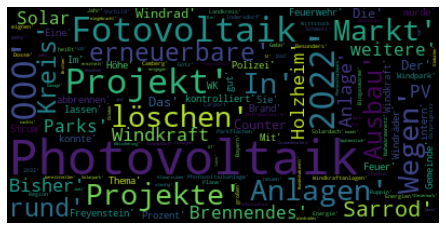

In [176]:
# merge the words in Desc tokenized column and then plot it
desc_merged = list(itertools.chain(*google_news_df['Desc tokenized']))

# counting the instances/ ocuurence of each word which were tokenized
desc_counts = Counter(desc_merged)

create_wordcloud(str(desc_counts))  # all the words 

+ plot to illustrate all words in the news's description

*Add additional stopwords*
+ words such as 000, de or punctutations are not providing any useful information  

In [177]:
remove_words = ["de","%","000","++"]
stopset.update(punctuation,remove_words)

# redefining the Desc without stop words column in our dataset
google_news_df["Desc without stopwords"] = google_news_df["desc"].apply(lambda x: remove_stopwords(x,stopset))
# google_news_df.head()

# redefining the tokenizer column in our dataset
google_news_df['Desc tokenized'] = google_news_df["Desc without stopwords"].apply(lambda x:tokenization(x))
google_news_df.head()

,title,media,date,desc,link,Without stopwords,tokenized,lemmatized,Desc without stopwords,Desc tokenized
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingeb...,"<a href= ""https://www.baulinks.de/webplugin/20...",Energienovelle Baugesetzbuch,"[Energienovelle, Baugesetzbuch]","[Energienovelle, Baugesetzbuch]",Das Bundeskabinett 12 Oktober eingebracht Bund...,"[Das, Bundeskabinett, 12, Oktober, eingebracht..."
2,Brand bei Freyenstein: Brennendes Windrad – es...,MOZ.de,vor 7 Stunden,Wegen der Höhe konnte die Feuerwehr das Windra...,"<a href= ""https://www.moz.de/lokales/neuruppin...",Brand Freyenstein Brennendes Windrad – konnte ...,"[Brand, Freyenstein, Brennendes, Windrad, –, k...","[Brand, Freyenstein, Brennendes, Windrad, –, k...",Wegen Höhe konnte Feuerwehr Windrad Freyenstei...,"[Wegen, Höhe, konnte, Feuerwehr, Windrad, Frey..."
3,Studien bestätigen Wirtschaftlichkeit – Unser ...,Windkraft-Journal,vor 10 Stunden,Carport mit Solardach „Besonders gut eignen si...,"<a href= ""https://www.windkraft-journal.de/202...",Studien bestätigen Wirtschaftlichkeit – Unser ...,"[Studien, bestätigen, Wirtschaftlichkeit, –, U...","[Studien, bestätigen, Wirtschaftlichkeit, –, U...",Carport Solardach „ Besonders gut eignen Proje...,"[Carport, Solardach, „, Besonders, gut, eignen..."
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbild...,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in ...,"<a href= ""https://www.windkraft-journal.de/202...",Markt Indersdorf Ein Nahwärmenetz Vorbildchara...,"[Markt, Indersdorf, Ein, Nahwärmenetz, Vorbild...","[Markt, Indersdorf, Ein, Nahwärmenetz, Vorbild...",Das Nahwärmenetz Götz Biogaswärme GmbH Markt I...,"[Das, Nahwärmenetz, Götz, Biogaswärme, GmbH, M..."
5,Erneuerbare Energien in Bergheim: Grüne wollen...,Kölner Stadt-Anzeiger,vor 12 Stunden,Bergheim. Bis zum Jahr 2032 will das Land Nord...,"<a href= ""https://www.ksta.de/region/rhein-erf...",Erneuerbare Energien Bergheim Grüne Windräder ...,"[Erneuerbare, Energien, Bergheim, Grüne, Windr...","[Erneuerbare, Energien, Bergheim, Grüne, Windr...",Bergheim Bis Jahr 2032 Land Nordrhein-Westfale...,"[Bergheim, Bis, Jahr, 2032, Land, Nordrhein-We..."


**TFID**

In [178]:
vectorizer.fit(google_news_df["Desc without stopwords"])
print(vectorizer.idf_)
print(vectorizer.vocabulary_) #summarize "

[5.18965474 6.48893773 4.81496129 5.39032544 4.59181774 5.28496492
 5.50810847 5.64163987 5.79579055 5.79579055 4.69717826 5.28496492
 5.28496492 4.81496129 6.48893773 5.28496492 4.4520558  5.28496492
 6.20125565 4.75433667 5.28496492 5.79579055 5.10264337 5.79579055
 4.75433667 3.65572438 5.50810847 5.28496492 4.49650756 6.20125565
 6.48893773 5.79579055 4.75433667 5.64163987 5.79579055 5.79579055
 6.20125565 4.81496129 5.28496492 4.49650756 5.64163987 5.64163987
 5.39032544 4.81496129 4.12181411 5.64163987 6.48893773 5.79579055
 4.59181774 6.48893773 5.28496492 5.39032544 6.48893773 6.20125565
 5.79579055 6.20125565 5.79579055 4.94849269 4.69717826 5.79579055
 5.28496492 4.75433667 5.28496492 5.10264337 5.64163987 4.15356281
 6.48893773 5.79579055 5.50810847 5.64163987 5.10264337 5.18965474
 5.64163987 5.10264337 5.79579055 4.69717826 5.79579055 5.39032544
 5.50810847 4.49650756 5.50810847 6.20125565 5.18965474 6.20125565
 6.48893773 6.48893773 4.75433667 5.28496492 5.28496492 4.5918

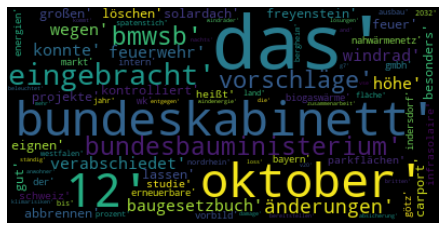

In [179]:
desc_words = []
for i in range(80): # starting 80 words
    desc_words.append(list(vectorizer.vocabulary_.keys())[i])
create_wordcloud(str(desc_words))

+ plot of initial 80 IDF values

In [180]:
print(vectorizer.vocabulary_)

{'das': 146, 'bundeskabinett': 127, '12': 4, 'oktober': 521, 'eingebracht': 182, 'bundesbauministerium': 126, 'bmwsb': 113, 'vorschläge': 725, 'änderungen': 797, 'baugesetzbuch': 75, 'verabschiedet': 705, 'wegen': 736, 'höhe': 360, 'konnte': 409, 'feuerwehr': 240, 'windrad': 768, 'freyenstein': 262, 'löschen': 450, 'feuer': 239, 'kontrolliert': 410, 'abbrennen': 25, 'lassen': 431, 'carport': 135, 'solardach': 624, 'besonders': 99, 'gut': 328, 'eignen': 177, 'projekte': 551, 'großen': 318, 'parkflächen': 530, 'heißt': 345, 'infrasolaire': 372, 'studie': 668, 'schweiz': 603, 'nahwärmenetz': 498, 'götz': 329, 'biogaswärme': 107, 'gmbh': 310, 'markt': 460, 'indersdorf': 369, 'vorbild': 722, 'erneuerbare': 219, 'energien': 192, 'bayern': 79, 'wk': 775, 'intern': 379, 'der': 155, 'spatenstich': 634, 'bergheim': 93, 'bis': 109, 'jahr': 381, '2032': 16, 'land': 423, 'nordrhein': 513, 'westfalen': 747, 'prozent': 554, 'fläche': 246, 'ausbau': 65, 'windenergie': 760, 'bereitstellen': 92, 'die': 

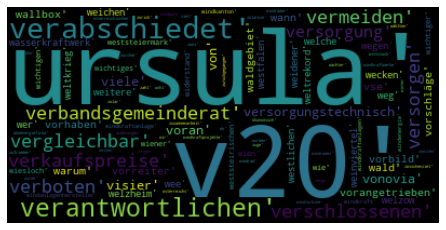

In [181]:
descimpwords = important_words(vectorizer.vocabulary_)
d = list(descimpwords.items())[len(descimpwords)-100:len(descimpwords)]
create_wordcloud(str(d))

> Plot illustrates the 100 most used words in the description in the news

### Lemmatizer 

In [182]:
google_news_df['Desc lemmatized'] = google_news_df['Desc tokenized'].apply(lambda x: lemmatizer(x))
google_news_df.head()

,title,media,date,desc,link,Without stopwords,tokenized,lemmatized,Desc without stopwords,Desc tokenized,Desc lemmatized
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingeb...,"<a href= ""https://www.baulinks.de/webplugin/20...",Energienovelle Baugesetzbuch,"[Energienovelle, Baugesetzbuch]","[Energienovelle, Baugesetzbuch]",Das Bundeskabinett 12 Oktober eingebracht Bund...,"[Das, Bundeskabinett, 12, Oktober, eingebracht...","[Das, Bundeskabinett, 12, Oktober, eingebracht..."
2,Brand bei Freyenstein: Brennendes Windrad – es...,MOZ.de,vor 7 Stunden,Wegen der Höhe konnte die Feuerwehr das Windra...,"<a href= ""https://www.moz.de/lokales/neuruppin...",Brand Freyenstein Brennendes Windrad – konnte ...,"[Brand, Freyenstein, Brennendes, Windrad, –, k...","[Brand, Freyenstein, Brennendes, Windrad, –, k...",Wegen Höhe konnte Feuerwehr Windrad Freyenstei...,"[Wegen, Höhe, konnte, Feuerwehr, Windrad, Frey...","[Wegen, Höhe, konnte, Feuerwehr, Windrad, Frey..."
3,Studien bestätigen Wirtschaftlichkeit – Unser ...,Windkraft-Journal,vor 10 Stunden,Carport mit Solardach „Besonders gut eignen si...,"<a href= ""https://www.windkraft-journal.de/202...",Studien bestätigen Wirtschaftlichkeit – Unser ...,"[Studien, bestätigen, Wirtschaftlichkeit, –, U...","[Studien, bestätigen, Wirtschaftlichkeit, –, U...",Carport Solardach „ Besonders gut eignen Proje...,"[Carport, Solardach, „, Besonders, gut, eignen...","[Carport, Solardach, „, Besonders, gut, eignen..."
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbild...,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in ...,"<a href= ""https://www.windkraft-journal.de/202...",Markt Indersdorf Ein Nahwärmenetz Vorbildchara...,"[Markt, Indersdorf, Ein, Nahwärmenetz, Vorbild...","[Markt, Indersdorf, Ein, Nahwärmenetz, Vorbild...",Das Nahwärmenetz Götz Biogaswärme GmbH Markt I...,"[Das, Nahwärmenetz, Götz, Biogaswärme, GmbH, M...","[Das, Nahwärmenetz, Götz, Biogaswärme, GmbH, M..."
5,Erneuerbare Energien in Bergheim: Grüne wollen...,Kölner Stadt-Anzeiger,vor 12 Stunden,Bergheim. Bis zum Jahr 2032 will das Land Nord...,"<a href= ""https://www.ksta.de/region/rhein-erf...",Erneuerbare Energien Bergheim Grüne Windräder ...,"[Erneuerbare, Energien, Bergheim, Grüne, Windr...","[Erneuerbare, Energien, Bergheim, Grüne, Windr...",Bergheim Bis Jahr 2032 Land Nordrhein-Westfale...,"[Bergheim, Bis, Jahr, 2032, Land, Nordrhein-We...","[Bergheim, Bis, Jahr, 2032, Land, Nordrhein-We..."


In [183]:
desc_lemmatizer_merged = list(itertools.chain(*google_news_df['Desc tokenized']))
# desc_lemmatizer_merged

lemmatized_word_count = Counter(desc_lemmatizer_merged)
lemmatized_word_count

Counter({'Das': 77,
         'Bundeskabinett': 17,
         '12': 17,
         'Oktober': 17,
         'eingebracht': 17,
         'Bundesbauministerium': 17,
         'BMWSB': 17,
         'Vorschläge': 17,
         'Änderungen': 17,
         'Baugesetzbuch': 17,
         'verabschiedet': 17,
         'Wegen': 36,
         'Höhe': 36,
         'konnte': 43,
         'Feuerwehr': 50,
         'Windrad': 78,
         'Freyenstein': 71,
         'löschen': 36,
         'Feuer': 36,
         'kontrolliert': 50,
         'abbrennen': 50,
         'lassen': 46,
         'Carport': 21,
         'Solardach': 21,
         '„': 59,
         'Besonders': 21,
         'gut': 32,
         'eignen': 21,
         'Projekte': 38,
         'großen': 26,
         'Parkflächen': 21,
         '“': 64,
         'heißt': 21,
         '‚InfraSolaire': 21,
         'Studie': 21,
         'Schweiz': 21,
         '...': 317,
         'Nahwärmenetz': 21,
         'Götz': 21,
         'Biogaswärme': 21,
        

In [184]:
# len(set(lemmatized_word_count) & set(desc_counts))

In [185]:
# len(lemmatized_word_count)

<!--  > All of lemmatized words are similar as in tokenized words i.e. synonyms do not exist -->

## Sentiment Analysis

In [186]:
from textblob_de import TextBlobDE
from nltk.sentiment.vader import SentimentIntensityAnalyzer
google_news_df[['polarity','subjectivity']] = google_news_df['Without stopwords'].apply(lambda Text: pd.Series(TextBlobDE(Text).sentiment))
for index, row in google_news_df['Without stopwords'].items():
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.333:
        google_news_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.333:
            google_news_df.loc[index,'sentiment'] = "positive"
    else:
            google_news_df.loc[index,'sentiment'] = "neutral"
google_news_df.loc[index,'neg'] = neg
google_news_df.loc[index,'pos'] = pos
google_news_df.loc[index,'neu'] = neu
google_news_df.loc[index,'compound'] = comp
    
google_news_df.head(5)

,title,media,date,desc,link,Without stopwords,tokenized,lemmatized,Desc without stopwords,Desc tokenized,Desc lemmatized,polarity,subjectivity,sentiment,neg,pos,neu,compound
1,Energienovelle im Baugesetzbuch,Baulinks,vor 4 Stunden,Das Bundeskabinett hat am 12. Oktober - eingeb...,"<a href= ""https://www.baulinks.de/webplugin/20...",Energienovelle Baugesetzbuch,"[Energienovelle, Baugesetzbuch]","[Energienovelle, Baugesetzbuch]",Das Bundeskabinett 12 Oktober eingebracht Bund...,"[Das, Bundeskabinett, 12, Oktober, eingebracht...","[Das, Bundeskabinett, 12, Oktober, eingebracht...",0.0,0.0,neutral,NaN,NaN,NaN,NaN
2,Brand bei Freyenstein: Brennendes Windrad – es...,MOZ.de,vor 7 Stunden,Wegen der Höhe konnte die Feuerwehr das Windra...,"<a href= ""https://www.moz.de/lokales/neuruppin...",Brand Freyenstein Brennendes Windrad – konnte ...,"[Brand, Freyenstein, Brennendes, Windrad, –, k...","[Brand, Freyenstein, Brennendes, Windrad, –, k...",Wegen Höhe konnte Feuerwehr Windrad Freyenstei...,"[Wegen, Höhe, konnte, Feuerwehr, Windrad, Frey...","[Wegen, Höhe, konnte, Feuerwehr, Windrad, Frey...",0.7,0.0,neutral,NaN,NaN,NaN,NaN
3,Studien bestätigen Wirtschaftlichkeit – Unser ...,Windkraft-Journal,vor 10 Stunden,Carport mit Solardach „Besonders gut eignen si...,"<a href= ""https://www.windkraft-journal.de/202...",Studien bestätigen Wirtschaftlichkeit – Unser ...,"[Studien, bestätigen, Wirtschaftlichkeit, –, U...","[Studien, bestätigen, Wirtschaftlichkeit, –, U...",Carport Solardach „ Besonders gut eignen Proje...,"[Carport, Solardach, „, Besonders, gut, eignen...","[Carport, Solardach, „, Besonders, gut, eignen...",0.7,0.0,neutral,NaN,NaN,NaN,NaN
4,Markt Indersdorf: Ein Nahwärmenetz mit Vorbild...,Windkraft-Journal,vor 10 Stunden,Das Nahwärmenetz der Götz Biogaswärme GmbH in ...,"<a href= ""https://www.windkraft-journal.de/202...",Markt Indersdorf Ein Nahwärmenetz Vorbildchara...,"[Markt, Indersdorf, Ein, Nahwärmenetz, Vorbild...","[Markt, Indersdorf, Ein, Nahwärmenetz, Vorbild...",Das Nahwärmenetz Götz Biogaswärme GmbH Markt I...,"[Das, Nahwärmenetz, Götz, Biogaswärme, GmbH, M...","[Das, Nahwärmenetz, Götz, Biogaswärme, GmbH, M...",0.0,0.0,neutral,NaN,NaN,NaN,NaN
5,Erneuerbare Energien in Bergheim: Grüne wollen...,Kölner Stadt-Anzeiger,vor 12 Stunden,Bergheim. Bis zum Jahr 2032 will das Land Nord...,"<a href= ""https://www.ksta.de/region/rhein-erf...",Erneuerbare Energien Bergheim Grüne Windräder ...,"[Erneuerbare, Energien, Bergheim, Grüne, Windr...","[Erneuerbare, Energien, Bergheim, Grüne, Windr...",Bergheim Bis Jahr 2032 Land Nordrhein-Westfale...,"[Bergheim, Bis, Jahr, 2032, Land, Nordrhein-We...","[Bergheim, Bis, Jahr, 2032, Land, Nordrhein-We...",0.0,0.0,neutral,NaN,NaN,NaN,NaN


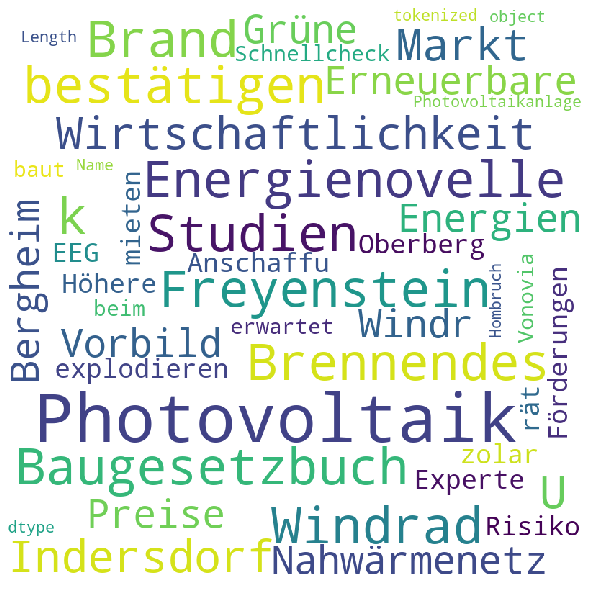

In [191]:
wordcloud = WordCloud(width = 800, height = 800,
                        background_color ='white',
                        stopwords = stopset,
                        min_font_size = 10).generate(str(google_news_df["tokenized"]))
        
# plot the WordCloud image   
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
    
plt.show()

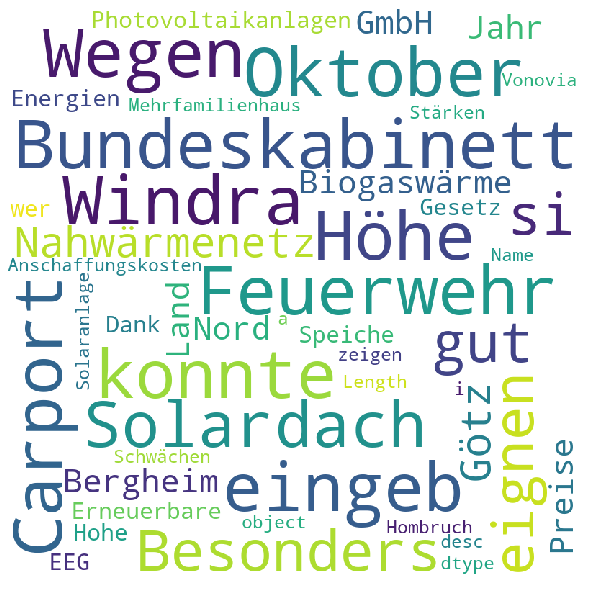

In [192]:
wordcloud = WordCloud(width = 800, height = 800,
                        background_color ='white',
                        stopwords = stopset,
                        min_font_size = 10).generate(str(google_news_df["desc"]))
        
# plot the WordCloud image                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
        
plt.show()

###  Segmentation

In [187]:
import spacy
from spacy.lang.de.examples import sentences

In [188]:
from spacy.tokens import doc
nlp=spacy.load('de_core_news_sm')
c=0
for t in titles_google:
    c=c+1
    print()
    print(c)
    doc=nlp(t)
    for sent in doc.sents:
         print(sent)
    


1

2
Energienovelle im Baugesetzbuch

3
Brand bei Freyenstein: Brennendes Windrad – es konnte nicht einfach gelöscht werden

4
Studien bestätigen Wirtschaftlichkeit – Unser Solarcarport mit transparenten Solarmodulen ist dabei!

5
Markt Indersdorf:
Ein Nahwärmenetz mit Vorbildcharakter

6
Erneuerbare Energien in Bergheim:
Grüne wollen Windräder in den Wald setzen

7
Windpark Losheim:
Betreiber reagiert und schaltet Lichter zeitweise ab​

8
V20 und G7 einigen sich auf Klimakatastrophenfinanzierung

9
Aufstellungsbeschluss für 140-MW-Solarpark in Kohleregion -
ERNEUERBARE
ENERGIEN

10
Ökostrom für 1.550 Haushalte:
EnBW weiht ihren ersten Solarpark in Hessen ein

11
Volle (Wind)-Kraft voraus

12

13
Energienovelle im Baugesetzbuch

14
Brand bei Freyenstein: Brennendes Windrad – es konnte nicht einfach gelöscht werden

15
Studien bestätigen Wirtschaftlichkeit – Unser Solarcarport mit transparenten Solarmodulen ist dabei!

16
Markt Indersdorf:
Ein Nahwärmenetz mit Vorbildcharakter

17
Erne

Stockender Ausbau der Windenergie: Was sich ändern muss

144

145
Brand bei Freyenstein: Brennendes Windrad – es konnte nicht einfach gelöscht werden

146
Explosiv!
Russische Granate bei Windpark-Bau ausgehoben

147
Windpark Losheim:
Betreiber reagiert und schaltet Lichter zeitweise ab​

148
Zwischen Ziegelhof und Buchenhüll sollen im Wald vier Windpark-Anlagen entstehen

149
Main-Kinzig-Kreis: Installation der Windräder am Brandenstein beginnt

150
Fünf Windräder für Brand

151
Windräder auf dem Dillenburger Gaulskopf?

152
Neue Windräder bei Martinshöhe

153
Energiewende: Stadt Elsfleth macht in Sachen Windkraft ihre Hausaufgaben pünktlich

154
Nordex steigert Verkaufspreise - Rückgang bei Auftragseingang | proplanta.de

155

156
Unglaublich: Dieses Windrad könnte eine Familie allein 100 Jahre mit Strom versorgen

157
reportnet24.de - Wittstock/Dosse - Windrad in Freyenstein brennt komplett ab

158
▶ Millionenschaden nach Brand von Windrad – Polizei prüft Wartungsfehler

159
Löschen 

Energiewende: Stadt Elsfleth macht in Sachen Windkraft ihre Hausaufgaben pünktlich

275
Nordex steigert Verkaufspreise - Rückgang bei Auftragseingang | proplanta.de

276

277
Unglaublich: Dieses Windrad könnte eine Familie allein 100 Jahre mit Strom versorgen

278
reportnet24.de - Wittstock/Dosse - Windrad in Freyenstein brennt komplett ab

279
▶ Millionenschaden nach Brand von Windrad – Polizei prüft Wartungsfehler

280
Löschen zu schwierig!
Feuerwehr lässt Windrad abbrennen

281
Brand bei Freyenstein: Brennendes Windrad – es konnte nicht einfach gelöscht werden

282
Projekte im Rems-Murr-Kreis:
EnBW geht bei Windkraft voran

283
Bei der Windkraft läuten in Buch die Alarmglocken

284
Windrad brannte: Polizei ermittelt

285
Windrad brannte: Polizei ermittelt

286
Ostprignitz-Ruppin: Windrad brannte: Polizei ermittelt

287

288
Frau will Solaranlage auf ihrem Dach installieren:
Nach Abfuhr der Stadtwerke ist sie richtig baff

289
Zustimmung mit „Bauchgrummeln“

290
Dem Blackout keine Ch

Erneuerbare Energien in Bergheim:
Grüne wollen Windräder in den Wald setzen

416
Globaler Hochfeste Schrauben in der Windkraft-Markt Analytischer Ausblick, Projektion Und Prognose
Bis 2033

417
Bei der Windkraft läuten in Buch die Alarmglocken

418
V20 und G7 einigen sich auf Klimakatastrophenfinanzierung

419

420
Griechenland:
Erstmals über Stunden Versorgung aus 100% Ökostrom

421
Zürich: Der Wind, der Wind, Neukoms Kind

422
Siemens Gamesa: Windturbine stellt neuen 24h-Lieferrekord auf

423
Lohnen sich kleine Windanlagen im Garten?

424
Kritik an Windkraftanlagen: Keine Ressourcenfresser und Giftschleudern |
tagesschau.de

425
Windenergie fürs eigene Haus - Wann sich ein Windrad für Sie lohnt

426
Zürich: Pläne für Windkraft-Ausbau liegen vor, es gibt Kritik

427
Mit kleinen Windrädern Strom erzeugen – besser als Solar?

428
Windkraft: Habeck schimpft auf Länder - 10.000 Megawatt stecken fest

429
Stockender Ausbau der Windenergie: Was sich ändern muss

430

431
Brand bei Freyenste

Brand bei Freyenstein: Brennendes Windrad – es konnte nicht einfach gelöscht werden

546
Projekte im Rems-Murr-Kreis:
EnBW geht bei Windkraft voran

547
Bei der Windkraft läuten in Buch die Alarmglocken

548
Windrad brannte: Polizei ermittelt

549
Windrad brannte: Polizei ermittelt

550
Ostprignitz-Ruppin: Windrad brannte: Polizei ermittelt

551

552
Frau will Solaranlage auf ihrem Dach installieren:
Nach Abfuhr der Stadtwerke ist sie richtig baff

553
Zustimmung mit „Bauchgrummeln“

554
Dem Blackout keine Chance: Rimsting analysiert Energieversorgung und den Einsatz von Stromspeichern

555
Glühende Landschaften: wenig beachtete Nachteile der Photovoltaik

556
Glühende Landschaften: wenig beachtete Nachteile der Photovoltaik

557
Solaranlagen auf Lärmschutzwänden?
– scienceticker.info

558
PV-Branchenbarometer auf hohem Niveau

559
Energienovelle im Baugesetzbuch

560
Energiewende nimmt in Memmelsdorf Fahrt auf, fossile Energieträger ein Auslaufmodell

561
Huy-Eilenstedt: Scheune samt 


683

684
Zustimmung mit „Bauchgrummeln“

685
Der Stadtrat tagte:
Unbedingt mehr Grün für Seehausen + Video ⋆ Nachrichten aus Leipzig

686
Speicher nutzt jetzt noch mehr Sonne vom Dach

687
Photovoltaikanlage mit Wallbox: Eine nachhaltige Kombination

688
Brand: Mehrere Feuer im Harz: Scheune mit Photovoltaikanlage geht in Flammen auf

689
Preise explodieren:
Experte in Oberberg rät von Kauf einer Photovoltaikanlage ab

690
EEG 2023: Höhere Förderungen für Photovoltaik-Anlagen - das müssen Eigenheimbesitzer wissen

691
Photovoltaik mieten: Ohne Risiko und Anschaffungskosten Richtung Energiewende

692
zolar im Schnellcheck:
Das erwartet Sie beim deutschen Solaranlagen-Anbieter

693
Vonovia baut Photovoltaikanlage in Hombruch | Dortmund

694

695
Großer Zuspruch für Solarpark in Niedernhausen

696
„Fotovoltaik und Denkmalschutz: Totalverbot fällt“

697
Fotovoltaik: 23 Anlagen auf öffentlichen Gebäuden - Frankenthal - DIE RHEINPFALZ

698
Dreieinhalb Hektar
Fotovoltaik auf Hügel in der Buc

In [189]:
# Counting and vectorizing a sentence and transforming it into arrays
from sklearn.feature_extraction.text import CountVectorizer
for t in titles_google:
    text=[t]
vectorizer=CountVectorizer() #create the transform  
vectorizer.fit(google_news_df["Without stopwords"]) #tokenize and build vocab
print(list(vectorizer.vocabulary_)[:100]) #summarize

['energienovelle', 'baugesetzbuch', 'brand', 'freyenstein', 'brennendes', 'windrad', 'konnte', 'einfach', 'gelöscht', 'studien', 'bestätigen', 'wirtschaftlichkeit', 'unser', 'solarcarport', 'transparenten', 'solarmodulen', 'dabei', 'markt', 'indersdorf', 'ein', 'nahwärmenetz', 'vorbildcharakter', 'erneuerbare', 'energien', 'bergheim', 'grüne', 'windräder', 'wald', 'setzen', 'windpark', 'losheim', 'betreiber', 'reagiert', 'schaltet', 'lichter', 'zeitweise', 'ab', 'v20', 'g7', 'klimakatastrophenfinanzierung', 'aufstellungsbeschluss', '140', 'mw', 'solarpark', 'kohleregion', 'ökostrom', '550', 'haushalte', 'enbw', 'weiht', 'ersten', 'hessen', 'volle', 'wind', 'kraft', 'voraus', 'afd', 'stadtrat', 'fordert', '180', 'grad', 'wende', 'windkraft', 'weiden', 'projekte', 'rems', 'murr', 'kreis', 'geht', 'voran', 'mehr', 'flächen', 'oberland', 'globaler', 'hochfeste', 'schrauben', 'analytischer', 'ausblick', 'projektion', 'und', 'prognose', 'bis', '2033', 'bei', 'läuten', 'buch', 'alarmglocken',

 Encoding of words and storing them in array (counting their occurence in the process )

N-gram 
- used in completeion of sentences (for example what we see in google these days)
- We can also check for grammar in a given sentence

In [190]:
# Function to generate N-grams
def N_grams(text, n):
    token = re.split("\s+", text) #split sentences into token 
    ngrams=[]
    for i in range(len(tokens)-n+1):
        temp=[tokens[j] for j in range(i,i+n)]
        ngrams.append(" ".join(temp))
    return ngrams

In [ ]:
# generate n grams here

# With Python News API

In [193]:
pip install newsapi-python

Note: you may need to restart the kernel to use updated packages.


In [194]:
from newsapi import NewsApiClient
# you have to get your api key from newapi.com and then paste it below
newsapi = NewsApiClient(api_key='950d6c91d94e4fca8cb99e404b2e2d3d')
news_results = {}

for search_term in search_terms:
    news = newsapi.get_everything(q=search_term, language='de')
    news_results = {**news,**news_results} # combining two dicts

# fetching articles
Headlines = news_results['articles']
Headlines[:30]

[{'source': {'id': 'spiegel-online', 'name': 'Spiegel Online'},
  'author': 'Markus Feldenkirchen',
  'title': 'News: Waffenlieferungen, Olaf Scholz, Annalena Baerbock, Winfried Kretschmann, Energie, Windkraft, Sahra Wagenknecht, Linke',
  'description': 'Der Grüne Ministerpräsident Kretschmann kommt beim Ausbau der Windenergie bestenfalls schleppend voran. Annalena Baerbock will mehr Waffen liefern. Und Sahra Wagenknecht will nicht austreten. Das ist die Lage am Freitag.',
  'url': 'https://www.spiegel.de/politik/deutschland/news-waffenlieferungen-olaf-scholz-annalena-baerbock-winfried-kretschmann-energie-windkraft-sahra-wagenknecht-linke-a-da11c085-c59d-4dd6-bc73-9dfa0d9ad71f',
  'urlToImage': 'https://cdn.prod.www.spiegel.de/images/dd17189a-707c-4b57-af32-bf59855d3d25_w1195_r1.77_fpx28.09_fpy49.93.png',
  'publishedAt': '2022-09-16T03:40:26Z',
  'content': 'Das blieb, nun ja, ein eher windiges Versprechen.\r\nSein Land ist nämlich noch immer Schlusslicht im nationalen Windstrom-Rank

In [195]:
news_df = pd.DataFrame(Headlines)
news_df.drop(columns = ["source","urlToImage"],axis =1, inplace = True)
news_df.head()

,author,title,description,url,publishedAt,content
0,Markus Feldenkirchen,"News: Waffenlieferungen, Olaf Scholz, Annalena...",Der Grüne Ministerpräsident Kretschmann kommt ...,https://www.spiegel.de/politik/deutschland/new...,2022-09-16T03:40:26Z,"Das blieb, nun ja, ein eher windiges Versprech..."
1,ZEIT ONLINE: News -,Energie: Cuxhaven schließt Partnerschaft bei O...,,https://www.zeit.de/zustimmung?url=https%3A%2F...,2022-09-27T16:51:47Z,When browsing with ads:\r\nWe collect personal...
2,tagesschau,Flugwindkraftwerke nutzen Windenergie in große...,Windräder sind mittlerweile ein gewohnter Anbl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-18T13:49:05Z,Windräder sind mittlerweile ein gewohnter Anbl...
3,tagesschau,Stockender Ausbau der Windenergie: Was sich än...,Obwohl die Zahl der installierten Windkraftanl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-28T06:03:18Z,Obwohl die Zahl der installierten Windkraftanl...
4,tagesschau,Frankreich: Hektik am Horizont,Frankreich hat bei der Windenergie im Vergleic...,https://www.tagesschau.de/ausland/europa/frank...,2022-09-27T14:20:59Z,Frankreich hat bei der Windenergie im Vergleic...


**Analysis with respect to title**

In [196]:
news_df["Without stopwords"] = news_df["title"].apply(lambda x: remove_stopwords(x,stopset))
news_df.head()

,author,title,description,url,publishedAt,content,Without stopwords
0,Markus Feldenkirchen,"News: Waffenlieferungen, Olaf Scholz, Annalena...",Der Grüne Ministerpräsident Kretschmann kommt ...,https://www.spiegel.de/politik/deutschland/new...,2022-09-16T03:40:26Z,"Das blieb, nun ja, ein eher windiges Versprech...",News Waffenlieferungen Olaf Scholz Annalena Ba...
1,ZEIT ONLINE: News -,Energie: Cuxhaven schließt Partnerschaft bei O...,,https://www.zeit.de/zustimmung?url=https%3A%2F...,2022-09-27T16:51:47Z,When browsing with ads:\r\nWe collect personal...,Energie Cuxhaven schließt Partnerschaft Offsho...
2,tagesschau,Flugwindkraftwerke nutzen Windenergie in große...,Windräder sind mittlerweile ein gewohnter Anbl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-18T13:49:05Z,Windräder sind mittlerweile ein gewohnter Anbl...,Flugwindkraftwerke nutzen Windenergie großer Höhe
3,tagesschau,Stockender Ausbau der Windenergie: Was sich än...,Obwohl die Zahl der installierten Windkraftanl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-28T06:03:18Z,Obwohl die Zahl der installierten Windkraftanl...,Stockender Ausbau Windenergie Was ändern
4,tagesschau,Frankreich: Hektik am Horizont,Frankreich hat bei der Windenergie im Vergleic...,https://www.tagesschau.de/ausland/europa/frank...,2022-09-27T14:20:59Z,Frankreich hat bei der Windenergie im Vergleic...,Frankreich Hektik Horizont


In [197]:
# Applying tokenization to the columns
news_df['tokenized'] = news_df["Without stopwords"].apply(lambda x:tokenization(x))
news_df.head()

,author,title,description,url,publishedAt,content,Without stopwords,tokenized
0,Markus Feldenkirchen,"News: Waffenlieferungen, Olaf Scholz, Annalena...",Der Grüne Ministerpräsident Kretschmann kommt ...,https://www.spiegel.de/politik/deutschland/new...,2022-09-16T03:40:26Z,"Das blieb, nun ja, ein eher windiges Versprech...",News Waffenlieferungen Olaf Scholz Annalena Ba...,"[News, Waffenlieferungen, Olaf, Scholz, Annale..."
1,ZEIT ONLINE: News -,Energie: Cuxhaven schließt Partnerschaft bei O...,,https://www.zeit.de/zustimmung?url=https%3A%2F...,2022-09-27T16:51:47Z,When browsing with ads:\r\nWe collect personal...,Energie Cuxhaven schließt Partnerschaft Offsho...,"[Energie, Cuxhaven, schließt, Partnerschaft, O..."
2,tagesschau,Flugwindkraftwerke nutzen Windenergie in große...,Windräder sind mittlerweile ein gewohnter Anbl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-18T13:49:05Z,Windräder sind mittlerweile ein gewohnter Anbl...,Flugwindkraftwerke nutzen Windenergie großer Höhe,"[Flugwindkraftwerke, nutzen, Windenergie, groß..."
3,tagesschau,Stockender Ausbau der Windenergie: Was sich än...,Obwohl die Zahl der installierten Windkraftanl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-28T06:03:18Z,Obwohl die Zahl der installierten Windkraftanl...,Stockender Ausbau Windenergie Was ändern,"[Stockender, Ausbau, Windenergie, Was, ändern]"
4,tagesschau,Frankreich: Hektik am Horizont,Frankreich hat bei der Windenergie im Vergleic...,https://www.tagesschau.de/ausland/europa/frank...,2022-09-27T14:20:59Z,Frankreich hat bei der Windenergie im Vergleic...,Frankreich Hektik Horizont,"[Frankreich, Hektik, Horizont]"


In [198]:
# merge the words in tokenized column and then plot it
merged = list(itertools.chain(*news_df['tokenized']))
merged

['News',
 'Waffenlieferungen',
 'Olaf',
 'Scholz',
 'Annalena',
 'Baerbock',
 'Winfried',
 'Kretschmann',
 'Energie',
 'Windkraft',
 'Sahra',
 'Wagenknecht',
 'Linke',
 'Energie',
 'Cuxhaven',
 'schließt',
 'Partnerschaft',
 'Offshore-Windenergie',
 'Flugwindkraftwerke',
 'nutzen',
 'Windenergie',
 'großer',
 'Höhe',
 'Stockender',
 'Ausbau',
 'Windenergie',
 'Was',
 'ändern',
 'Frankreich',
 'Hektik',
 'Horizont',
 'Windenergie',
 'Siemens',
 'erzielt',
 'Stromrekord',
 'neueartigem',
 'Windrad',
 'Windenergie',
 'Region',
 'München',
 '``',
 'Streuselkuchen',
 "''",
 'Die',
 'Offshore-Windkraft',
 '–',
 'Baustein',
 'Energieunabhängigkeit',
 'Uno-Organisation',
 'sieht',
 'Energiesicherheit',
 'Klimawandel',
 'bedroht',
 'Atmosphäre',
 'Quelle',
 'grünen',
 'Wasserstoff',
 'Windenergie',
 'Aufwind',
 'Erneuerbaren',
 'Habeck',
 'unzufrieden',
 'Windenergieausbau',
 'Land',
 'schneller',
 'gehen',
 'Norddeutsche',
 'Bundesländer',
 'eigene',
 'Strompreise',
 'Gaspreisbremse',
 'Gasuml

In [199]:
counts = Counter(merged)
counts

Counter({'News': 1,
         'Waffenlieferungen': 1,
         'Olaf': 1,
         'Scholz': 2,
         'Annalena': 1,
         'Baerbock': 1,
         'Winfried': 1,
         'Kretschmann': 1,
         'Energie': 12,
         'Windkraft': 5,
         'Sahra': 1,
         'Wagenknecht': 1,
         'Linke': 1,
         'Cuxhaven': 1,
         'schließt': 1,
         'Partnerschaft': 1,
         'Offshore-Windenergie': 1,
         'Flugwindkraftwerke': 1,
         'nutzen': 1,
         'Windenergie': 11,
         'großer': 1,
         'Höhe': 1,
         'Stockender': 1,
         'Ausbau': 3,
         'Was': 3,
         'ändern': 1,
         'Frankreich': 3,
         'Hektik': 1,
         'Horizont': 1,
         'Siemens': 3,
         'erzielt': 1,
         'Stromrekord': 1,
         'neueartigem': 1,
         'Windrad': 1,
         'Region': 1,
         'München': 1,
         '``': 6,
         'Streuselkuchen': 1,
         "''": 5,
         'Die': 2,
         'Offshore-Windkraft': 1,
 

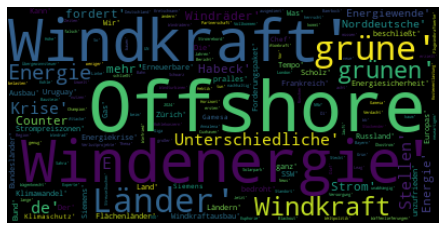

In [200]:
create_wordcloud(str(counts))  # all the words 

+ plot to illustrate all words in the news

#### Add additional stopwords
+ words such as 000, de or punctutations are not providing any useful information  

In [201]:
stopset.update(punctuation)

In [202]:
# redefining the without stop words column in our dataset
news_df["Without stopwords"] = news_df["title"].apply(lambda x: remove_stopwords(x,stopset))
news_df.head()

,author,title,description,url,publishedAt,content,Without stopwords,tokenized
0,Markus Feldenkirchen,"News: Waffenlieferungen, Olaf Scholz, Annalena...",Der Grüne Ministerpräsident Kretschmann kommt ...,https://www.spiegel.de/politik/deutschland/new...,2022-09-16T03:40:26Z,"Das blieb, nun ja, ein eher windiges Versprech...",News Waffenlieferungen Olaf Scholz Annalena Ba...,"[News, Waffenlieferungen, Olaf, Scholz, Annale..."
1,ZEIT ONLINE: News -,Energie: Cuxhaven schließt Partnerschaft bei O...,,https://www.zeit.de/zustimmung?url=https%3A%2F...,2022-09-27T16:51:47Z,When browsing with ads:\r\nWe collect personal...,Energie Cuxhaven schließt Partnerschaft Offsho...,"[Energie, Cuxhaven, schließt, Partnerschaft, O..."
2,tagesschau,Flugwindkraftwerke nutzen Windenergie in große...,Windräder sind mittlerweile ein gewohnter Anbl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-18T13:49:05Z,Windräder sind mittlerweile ein gewohnter Anbl...,Flugwindkraftwerke nutzen Windenergie großer Höhe,"[Flugwindkraftwerke, nutzen, Windenergie, groß..."
3,tagesschau,Stockender Ausbau der Windenergie: Was sich än...,Obwohl die Zahl der installierten Windkraftanl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-28T06:03:18Z,Obwohl die Zahl der installierten Windkraftanl...,Stockender Ausbau Windenergie Was ändern,"[Stockender, Ausbau, Windenergie, Was, ändern]"
4,tagesschau,Frankreich: Hektik am Horizont,Frankreich hat bei der Windenergie im Vergleic...,https://www.tagesschau.de/ausland/europa/frank...,2022-09-27T14:20:59Z,Frankreich hat bei der Windenergie im Vergleic...,Frankreich Hektik Horizont,"[Frankreich, Hektik, Horizont]"


In [203]:
# redefining the tokenizer column in our dataset
news_df['tokenized'] = news_df["Without stopwords"].apply(lambda x:tokenization(x))
news_df.head()

,author,title,description,url,publishedAt,content,Without stopwords,tokenized
0,Markus Feldenkirchen,"News: Waffenlieferungen, Olaf Scholz, Annalena...",Der Grüne Ministerpräsident Kretschmann kommt ...,https://www.spiegel.de/politik/deutschland/new...,2022-09-16T03:40:26Z,"Das blieb, nun ja, ein eher windiges Versprech...",News Waffenlieferungen Olaf Scholz Annalena Ba...,"[News, Waffenlieferungen, Olaf, Scholz, Annale..."
1,ZEIT ONLINE: News -,Energie: Cuxhaven schließt Partnerschaft bei O...,,https://www.zeit.de/zustimmung?url=https%3A%2F...,2022-09-27T16:51:47Z,When browsing with ads:\r\nWe collect personal...,Energie Cuxhaven schließt Partnerschaft Offsho...,"[Energie, Cuxhaven, schließt, Partnerschaft, O..."
2,tagesschau,Flugwindkraftwerke nutzen Windenergie in große...,Windräder sind mittlerweile ein gewohnter Anbl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-18T13:49:05Z,Windräder sind mittlerweile ein gewohnter Anbl...,Flugwindkraftwerke nutzen Windenergie großer Höhe,"[Flugwindkraftwerke, nutzen, Windenergie, groß..."
3,tagesschau,Stockender Ausbau der Windenergie: Was sich än...,Obwohl die Zahl der installierten Windkraftanl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-28T06:03:18Z,Obwohl die Zahl der installierten Windkraftanl...,Stockender Ausbau Windenergie Was ändern,"[Stockender, Ausbau, Windenergie, Was, ändern]"
4,tagesschau,Frankreich: Hektik am Horizont,Frankreich hat bei der Windenergie im Vergleic...,https://www.tagesschau.de/ausland/europa/frank...,2022-09-27T14:20:59Z,Frankreich hat bei der Windenergie im Vergleic...,Frankreich Hektik Horizont,"[Frankreich, Hektik, Horizont]"


**TFID**

In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(news_df["Without stopwords"])
print(vectorizer.idf_)
print(list(vectorizer.vocabulary_)[:50]) #summarize "

[4.92197334 4.92197334 4.22882616 4.92197334 4.92197334 4.92197334
 4.92197334 4.51650823 4.92197334 4.92197334 4.92197334 4.92197334
 4.92197334 4.92197334 4.51650823 4.92197334 4.92197334 4.92197334
 4.92197334 4.92197334 4.92197334 4.92197334 4.92197334 4.92197334
 4.92197334 4.51650823 4.51650823 4.92197334 4.92197334 4.92197334
 4.22882616 4.92197334 4.51650823 4.92197334 4.92197334 4.51650823
 4.92197334 4.51650823 4.92197334 4.92197334 4.92197334 4.51650823
 4.92197334 4.92197334 4.51650823 4.92197334 4.22882616 4.92197334
 4.51650823 4.51650823 4.51650823 4.22882616 4.92197334 4.92197334
 4.92197334 4.92197334 4.51650823 4.92197334 4.92197334 4.92197334
 4.92197334 4.92197334 4.22882616 4.92197334 4.51650823 4.92197334
 4.92197334 4.51650823 4.51650823 4.92197334 4.92197334 4.92197334
 4.92197334 4.22882616 4.92197334 4.22882616 4.92197334 4.51650823
 4.51650823 4.92197334 4.92197334 4.92197334 4.92197334 4.92197334
 4.92197334 4.92197334 4.92197334 4.92197334 4.92197334 2.9070

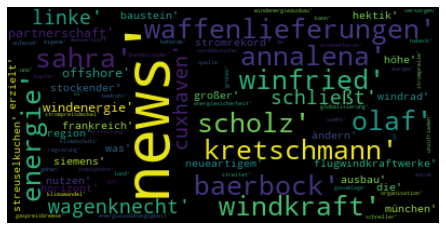

In [205]:
words = []
for i in range(80): # starting 80 words
    words.append(list(vectorizer.vocabulary_.keys())[i])
create_wordcloud(str(words))

+ plot of initial 80 IDF values

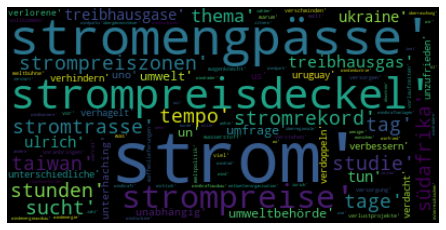

In [206]:
impwords = important_words(vectorizer.vocabulary_)
d = list(impwords.items())[len(impwords)-100:len(impwords)]
create_wordcloud(str(d))

> Plot illustrates the 100 most important terminologies in the news
<!-- + Solar energy and its projects are more in news than wind or any other renewable energy  -->

### Lemmatizer 

In [207]:
news_df['lemmatized'] = news_df['tokenized'].apply(lambda x: lemmatizer(x))
news_df.head()

,author,title,description,url,publishedAt,content,Without stopwords,tokenized,lemmatized
0,Markus Feldenkirchen,"News: Waffenlieferungen, Olaf Scholz, Annalena...",Der Grüne Ministerpräsident Kretschmann kommt ...,https://www.spiegel.de/politik/deutschland/new...,2022-09-16T03:40:26Z,"Das blieb, nun ja, ein eher windiges Versprech...",News Waffenlieferungen Olaf Scholz Annalena Ba...,"[News, Waffenlieferungen, Olaf, Scholz, Annale...","[News, Waffenlieferungen, Olaf, Scholz, Annale..."
1,ZEIT ONLINE: News -,Energie: Cuxhaven schließt Partnerschaft bei O...,,https://www.zeit.de/zustimmung?url=https%3A%2F...,2022-09-27T16:51:47Z,When browsing with ads:\r\nWe collect personal...,Energie Cuxhaven schließt Partnerschaft Offsho...,"[Energie, Cuxhaven, schließt, Partnerschaft, O...","[Energie, Cuxhaven, schließt, Partnerschaft, O..."
2,tagesschau,Flugwindkraftwerke nutzen Windenergie in große...,Windräder sind mittlerweile ein gewohnter Anbl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-18T13:49:05Z,Windräder sind mittlerweile ein gewohnter Anbl...,Flugwindkraftwerke nutzen Windenergie großer Höhe,"[Flugwindkraftwerke, nutzen, Windenergie, groß...","[Flugwindkraftwerke, nutzen, Windenergie, groß..."
3,tagesschau,Stockender Ausbau der Windenergie: Was sich än...,Obwohl die Zahl der installierten Windkraftanl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-28T06:03:18Z,Obwohl die Zahl der installierten Windkraftanl...,Stockender Ausbau Windenergie Was ändern,"[Stockender, Ausbau, Windenergie, Was, ändern]","[Stockender, Ausbau, Windenergie, Was, ändern]"
4,tagesschau,Frankreich: Hektik am Horizont,Frankreich hat bei der Windenergie im Vergleic...,https://www.tagesschau.de/ausland/europa/frank...,2022-09-27T14:20:59Z,Frankreich hat bei der Windenergie im Vergleic...,Frankreich Hektik Horizont,"[Frankreich, Hektik, Horizont]","[Frankreich, Hektik, Horizont]"


In [208]:
lemmatizer_merged = list(itertools.chain(*news_df['tokenized']))
lemmatizer_merged

['News',
 'Waffenlieferungen',
 'Olaf',
 'Scholz',
 'Annalena',
 'Baerbock',
 'Winfried',
 'Kretschmann',
 'Energie',
 'Windkraft',
 'Sahra',
 'Wagenknecht',
 'Linke',
 'Energie',
 'Cuxhaven',
 'schließt',
 'Partnerschaft',
 'Offshore-Windenergie',
 'Flugwindkraftwerke',
 'nutzen',
 'Windenergie',
 'großer',
 'Höhe',
 'Stockender',
 'Ausbau',
 'Windenergie',
 'Was',
 'ändern',
 'Frankreich',
 'Hektik',
 'Horizont',
 'Windenergie',
 'Siemens',
 'erzielt',
 'Stromrekord',
 'neueartigem',
 'Windrad',
 'Windenergie',
 'Region',
 'München',
 '``',
 'Streuselkuchen',
 "''",
 'Die',
 'Offshore-Windkraft',
 '–',
 'Baustein',
 'Energieunabhängigkeit',
 'Uno-Organisation',
 'sieht',
 'Energiesicherheit',
 'Klimawandel',
 'bedroht',
 'Atmosphäre',
 'Quelle',
 'grünen',
 'Wasserstoff',
 'Windenergie',
 'Aufwind',
 'Erneuerbaren',
 'Habeck',
 'unzufrieden',
 'Windenergieausbau',
 'Land',
 'schneller',
 'gehen',
 'Norddeutsche',
 'Bundesländer',
 'eigene',
 'Strompreise',
 'Gaspreisbremse',
 'Gasuml

In [209]:
lemmatized_word_count = Counter(lemmatizer_merged)
lemmatized_word_count

Counter({'News': 1,
         'Waffenlieferungen': 1,
         'Olaf': 1,
         'Scholz': 2,
         'Annalena': 1,
         'Baerbock': 1,
         'Winfried': 1,
         'Kretschmann': 1,
         'Energie': 12,
         'Windkraft': 5,
         'Sahra': 1,
         'Wagenknecht': 1,
         'Linke': 1,
         'Cuxhaven': 1,
         'schließt': 1,
         'Partnerschaft': 1,
         'Offshore-Windenergie': 1,
         'Flugwindkraftwerke': 1,
         'nutzen': 1,
         'Windenergie': 11,
         'großer': 1,
         'Höhe': 1,
         'Stockender': 1,
         'Ausbau': 3,
         'Was': 3,
         'ändern': 1,
         'Frankreich': 3,
         'Hektik': 1,
         'Horizont': 1,
         'Siemens': 3,
         'erzielt': 1,
         'Stromrekord': 1,
         'neueartigem': 1,
         'Windrad': 1,
         'Region': 1,
         'München': 1,
         '``': 6,
         'Streuselkuchen': 1,
         "''": 5,
         'Die': 2,
         'Offshore-Windkraft': 1,
 

In [210]:
# [same for same in lemmatized_word_count if lemmatized_word_count == merged]
# count
# len(lemmatized_word_count && merged)

In [211]:
# len(lemmatized_word_count)

<!--  > Most of lemmatized words(724) are similar as in tokenized words i.e. most of synonyms do not exist -->

 **Parts of speech tags**

In [212]:
titles_python_news = news_df["title"]
desc_python_news = news_df["content"]

In [213]:
from nltk.tokenize import word_tokenize

def pos():
    try:
        for t in titles_python_news:
            t=str(t)
            words=word_tokenize(t)
            final=nltk.pos_tag(words)
            print(final)
    except Exception as e:
        print(str(e))    
pos()

[('News', 'NNS'), (':', ':'), ('Waffenlieferungen', 'NNP'), (',', ','), ('Olaf', 'NNP'), ('Scholz', 'NNP'), (',', ','), ('Annalena', 'NNP'), ('Baerbock', 'NNP'), (',', ','), ('Winfried', 'NNP'), ('Kretschmann', 'NNP'), (',', ','), ('Energie', 'NNP'), (',', ','), ('Windkraft', 'NNP'), (',', ','), ('Sahra', 'NNP'), ('Wagenknecht', 'NNP'), (',', ','), ('Linke', 'NNP')]
[('Energie', 'NN'), (':', ':'), ('Cuxhaven', 'NNP'), ('schließt', 'VBD'), ('Partnerschaft', 'NNP'), ('bei', 'VBD'), ('Offshore-Windenergie', 'NNP')]
[('Flugwindkraftwerke', 'NNP'), ('nutzen', 'JJ'), ('Windenergie', 'NNP'), ('in', 'IN'), ('großer', 'NN'), ('Höhe', 'NNP')]
[('Stockender', 'NNP'), ('Ausbau', 'NNP'), ('der', 'NN'), ('Windenergie', 'NNP'), (':', ':'), ('Was', 'NNP'), ('sich', 'JJ'), ('ändern', 'NNP'), ('muss', 'NN')]
[('Frankreich', 'NNS'), (':', ':'), ('Hektik', 'NNP'), ('am', 'VBP'), ('Horizont', 'NNP')]
[('Windenergie', 'NN'), (':', ':'), ('Siemens', 'NNP'), ('erzielt', 'VBD'), ('Stromrekord', 'NNP'), ('mit',

[('Energiekrise', 'NN'), (':', ':'), ('Norddeutsche', 'NNP'), ('Länder', 'NNP'), ('wollen', 'VBD'), ('unterschiedliche', 'JJ'), ('Strompreiszonen', 'NNP'), ('und', 'NN'), ('kritisieren', 'VBD'), ('Bayern', 'NNP'), ('scharf', 'NN')]
[('„', 'JJ'), ('Attacke', 'NNP'), ('nicht', 'NN'), ('nachhaltig', 'NN'), ('genug', 'NN'), ('“', 'NNP'), ('-', ':'), ('Steckt', 'NNP'), ('Russland', 'NNP'), ('hinter', 'NN'), ('dem', 'NN'), ('Bahn-Blackout', 'NNP'), ('?', '.'), ('Experte', 'NNP'), ('hat', 'WP'), ('ganz', 'VBD'), ('anderen', 'NNS'), ('Verdacht', 'NNP')]
[('Energiekrise', 'NN'), (':', ':'), ('London', 'NNP'), (':', ':'), ('Übergewinnsteuer', 'NN'), ('auch', 'JJ'), ('für', 'NN'), ('Erneuerbare', 'NNP'), ('und', 'NN'), ('Atomkraft', 'NNP')]
[('Freizeit', 'NN'), (':', ':'), ('Skihalle', 'NNP'), ('Bispingen', 'NNP'), ('bleibt', 'JJ'), ('geöffnet', 'NN'), (':', ':'), ('Strom', 'NNP'), ('ist', 'NN'), ('eingekauft', 'NN')]
[('Umwelt', 'NN'), (':', ':'), ('UN-Bericht', 'JJ'), (':', ':'), ('Klimawandel'

**Chunking**


In [214]:
def process_content():
    try:
        for t in titles_python_news:
            t=str(t)
            words=word_tokenize(t)
            final=nltk.pos_tag(words)
            chunkGram=r"""Chunk: {<RB.?>*<VB.?>*<NNP><NN>?}"""
            chunkParser=nltk.RegexpParser(chunkGram)
            chunked=chunkParser.parse(final)
            print(chunked)
    except Exception as e:
        print(str(e))
        
process_content()

(S
  News/NNS
  :/:
  (Chunk Waffenlieferungen/NNP)
  ,/,
  (Chunk Olaf/NNP)
  (Chunk Scholz/NNP)
  ,/,
  (Chunk Annalena/NNP)
  (Chunk Baerbock/NNP)
  ,/,
  (Chunk Winfried/NNP)
  (Chunk Kretschmann/NNP)
  ,/,
  (Chunk Energie/NNP)
  ,/,
  (Chunk Windkraft/NNP)
  ,/,
  (Chunk Sahra/NNP)
  (Chunk Wagenknecht/NNP)
  ,/,
  (Chunk Linke/NNP))
(S
  Energie/NN
  :/:
  (Chunk Cuxhaven/NNP)
  (Chunk schließt/VBD Partnerschaft/NNP)
  (Chunk bei/VBD Offshore-Windenergie/NNP))
(S
  (Chunk Flugwindkraftwerke/NNP)
  nutzen/JJ
  (Chunk Windenergie/NNP)
  in/IN
  großer/NN
  (Chunk Höhe/NNP))
(S
  (Chunk Stockender/NNP)
  (Chunk Ausbau/NNP der/NN)
  (Chunk Windenergie/NNP)
  :/:
  (Chunk Was/NNP)
  sich/JJ
  (Chunk ändern/NNP muss/NN))
(S Frankreich/NNS :/: (Chunk Hektik/NNP) (Chunk am/VBP Horizont/NNP))
(S
  Windenergie/NN
  :/:
  (Chunk Siemens/NNP)
  (Chunk erzielt/VBD Stromrekord/NNP mit/NN)
  neueartigem/NN
  (Chunk Windrad/NNP))
(S
  Windenergie/NN
  :/:
  Region/NN
  (Chunk München/NNP soll/N

  (Chunk Zeiten/NNP))
(S
  (Chunk Düstere/NNP)
  (Chunk Prognose/NNP)
  -/:
  (Chunk Habeck/NNP erwartet/NN)
  für/NN
  2023/CD
  hohe/NN
  (Chunk Inflation/NNP)
  und/IN
  (Chunk Rezession/NNP))
(S
  Nissan-Mitarbeiter/JJ
  verrät/NN
  :/:
  So/RB
  lange/JJ
  halten/JJ
  (Chunk E-Auto-Akkus/NNP wirklich/NN))
(S
  (Chunk Wenn/NNP)
  (Chunk alle/VBZ Nachts/NNP das/NN)
  (Chunk E-Auto/NNP zu/NN)
  (Chunk Hause/NNP aufladen/NN)
  ,/,
  läuft/NN
  was/VBD
  ganz/JJ
  falsch/NN)
(S
  (Chunk Vor/NNP)
  acht/JJ
  (Chunk Jahren/NNP war/NN)
  (Chunk Zürich/NNP)
  (Chunk als/VBZ Standort/NNP für/NN)
  (Chunk Windräder/NNP noch/NN)
  kaum/NN
  ein/NN
  (Chunk Thema/NNP)
  ./.
  (Chunk Jetzt/NNP herrscht/NN)
  auf/NN
  einmal/JJ
  grüne/NN
  (Chunk Euphorie/NNP))
(S
  (Chunk Vor/NNP)
  acht/JJ
  (Chunk Jahren/NNP war/NN)
  (Chunk Zürich/NNP)
  (Chunk als/VBZ Standort/NNP für/NN)
  (Chunk Windräder/NNP kaum/NN)
  ein/NN
  (Chunk Thema/NNP)
  ./.
  (Chunk Jetzt/NNP herrscht/NN)
  auf/NN
  einmal/JJ

 **Chinking**

In [215]:
def process_content():
    try:
        for t in titles_python_news:
            t=str(t)
            words=word_tokenize(t)
            final=nltk.pos_tag(words)
            chunkGram=r"""Chunk: {<.*>+}
                        }<VB.?|IN|DT>+{"""
            chunkParser=nltk.RegexpParser(chunkGram)
            chunked=chunkParser.parse(final)
            print(chunked)
    except Exception as e:
        print(str(e))
        
process_content()

(S
  (Chunk
    News/NNS
    :/:
    Waffenlieferungen/NNP
    ,/,
    Olaf/NNP
    Scholz/NNP
    ,/,
    Annalena/NNP
    Baerbock/NNP
    ,/,
    Winfried/NNP
    Kretschmann/NNP
    ,/,
    Energie/NNP
    ,/,
    Windkraft/NNP
    ,/,
    Sahra/NNP
    Wagenknecht/NNP
    ,/,
    Linke/NNP))
(S
  (Chunk Energie/NN :/: Cuxhaven/NNP)
  schließt/VBD
  (Chunk Partnerschaft/NNP)
  bei/VBD
  (Chunk Offshore-Windenergie/NNP))
(S
  (Chunk Flugwindkraftwerke/NNP nutzen/JJ Windenergie/NNP)
  in/IN
  (Chunk großer/NN Höhe/NNP))
(S
  (Chunk
    Stockender/NNP
    Ausbau/NNP
    der/NN
    Windenergie/NNP
    :/:
    Was/NNP
    sich/JJ
    ändern/NNP
    muss/NN))
(S (Chunk Frankreich/NNS :/: Hektik/NNP) am/VBP (Chunk Horizont/NNP))
(S
  (Chunk Windenergie/NN :/: Siemens/NNP)
  erzielt/VBD
  (Chunk Stromrekord/NNP mit/NN neueartigem/NN Windrad/NNP))
(S
  (Chunk
    Windenergie/NN
    :/:
    Region/NN
    München/NNP
    soll/NN
    kein/NN
    ``/``
    Streuselkuchen/NNP
    ''/''
    werde

  (Chunk -/: NDR.de/NN))
(S
  (Chunk
    Energiekrise/NN
    :/:
    London/NNP
    :/:
    Übergewinnsteuer/NN
    auch/JJ
    für/NN
    Erneuerbare/NNP
    und/NN
    Atomkraft/NNP))
(S
  (Chunk
    «/NN
    Wo/NNP
    ein/NN
    Wille/NNP
    ,/,
    da/NN
    Promille/NNP
    »/NNP
    –/NNP)
  wie/VBD
  (Chunk
    aus/JJ
    dem/NN
    österreichischen/NNP
    Spasspolitiker/NNP
    Marco/NNP
    Pogo/NNP
    eine/NN
    echte/NN
    Überraschung/NNP
    wurde/NN))
(S
  (Chunk Energie/NN :/: Kohlekonzern/NNP Leag/NNP will/MD)
  ersten/VB
  (Chunk Giga-Solarpark/NNP Europas/NNP bauen/NN))
(S
  (Chunk
    Erneuerbare/NNP
    Energien/NNP
    :/:
    Mercedes/NNP
    plant/NN
    100-Megawatt-Windpark/NN)
  in/IN
  (Chunk Norddeutschland/NNP))
(S
  (Chunk Bundesbern/NNP steht/NN unter/NN Strom/NNP :/:)
  was/VBD
  (Chunk alles/NNS läuft/JJ gegen/NN den/JJ drohenden/NN Mangel/NNP))
(S
  (Chunk Energie/NN :/: Norddeutsche/NNP Flächenländer/NNP)
  wollen/VBD
  (Chunk Strompreiszonen/NN

**Named Entity Recognition**

In [217]:
from IPython.display import display
def process_content():
    try:
        for t in titles_python_news:
            t=str(t)
            words=word_tokenize(t)
            tagged=nltk.pos_tag(words)
            namedEnt=nltk.ne_chunk(tagged)         
    except Exception as e:
        print(str(e))
    return namedEnt    
print(process_content())

(S
  (GPE Landtagswahl/NNP)
  in/IN
  (GPE Niedersachsen/NNP)
  :/:
  (PERSON Schlechte/NNP Zeiten/NNP)
  für/VBZ
  Schwarz-Grün/NNP)


## Sentiment Analysis

In [218]:
news_df[['polarity','subjectivity']] = news_df['Without stopwords'].apply(lambda Text: pd.Series(TextBlobDE(Text).sentiment))
for index, row in google_news_df['Without stopwords'].items():
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.333:
        news_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.333:
        news_df.loc[index,'sentiment'] = "positive"
    else:
        news_df.loc[index,'sentiment'] = "neutral"
news_df.loc[index,'neg'] = neg
news_df.loc[index,'pos'] = pos
news_df.loc[index,'neu'] = neu
news_df.loc[index,'compound'] = comp
    
news_df.head(5)

,author,title,description,url,publishedAt,content,Without stopwords,tokenized,lemmatized,polarity,subjectivity,sentiment,neg,pos,neu,compound
0,Markus Feldenkirchen,"News: Waffenlieferungen, Olaf Scholz, Annalena...",Der Grüne Ministerpräsident Kretschmann kommt ...,https://www.spiegel.de/politik/deutschland/new...,2022-09-16T03:40:26Z,"Das blieb, nun ja, ein eher windiges Versprech...",News Waffenlieferungen Olaf Scholz Annalena Ba...,"[News, Waffenlieferungen, Olaf, Scholz, Annale...","[News, Waffenlieferungen, Olaf, Scholz, Annale...",0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ZEIT ONLINE: News -,Energie: Cuxhaven schließt Partnerschaft bei O...,,https://www.zeit.de/zustimmung?url=https%3A%2F...,2022-09-27T16:51:47Z,When browsing with ads:\r\nWe collect personal...,Energie Cuxhaven schließt Partnerschaft Offsho...,"[Energie, Cuxhaven, schließt, Partnerschaft, O...","[Energie, Cuxhaven, schließt, Partnerschaft, O...",0.0,0.0,neutral,NaN,NaN,NaN,NaN
2,tagesschau,Flugwindkraftwerke nutzen Windenergie in große...,Windräder sind mittlerweile ein gewohnter Anbl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-18T13:49:05Z,Windräder sind mittlerweile ein gewohnter Anbl...,Flugwindkraftwerke nutzen Windenergie großer Höhe,"[Flugwindkraftwerke, nutzen, Windenergie, groß...","[Flugwindkraftwerke, nutzen, Windenergie, groß...",0.7,0.0,neutral,NaN,NaN,NaN,NaN
3,tagesschau,Stockender Ausbau der Windenergie: Was sich än...,Obwohl die Zahl der installierten Windkraftanl...,https://www.tagesschau.de/wirtschaft/technolog...,2022-09-28T06:03:18Z,Obwohl die Zahl der installierten Windkraftanl...,Stockender Ausbau Windenergie Was ändern,"[Stockender, Ausbau, Windenergie, Was, ändern]","[Stockender, Ausbau, Windenergie, Was, ändern]",0.0,0.0,neutral,NaN,NaN,NaN,NaN
4,tagesschau,Frankreich: Hektik am Horizont,Frankreich hat bei der Windenergie im Vergleic...,https://www.tagesschau.de/ausland/europa/frank...,2022-09-27T14:20:59Z,Frankreich hat bei der Windenergie im Vergleic...,Frankreich Hektik Horizont,"[Frankreich, Hektik, Horizont]","[Frankreich, Hektik, Horizont]",0.0,0.0,neutral,NaN,NaN,NaN,NaN


## 3. Evaluation